**Name: Krish Murjani | N Number: N10121101 | NetID: km6520**
### **AI CS-GY-6613 Assignment 3**

# **Sports Analytics**

# Introduction

In this assignment, I'll walk you through using deep learning for sports analytics, where we use object detection and tracking to analyze sports videos. The two primary tasks we'll cover are:

- **Faster R-CNN Object Detection**: We will use Faster R-CNN to detect objects in a sports video, specifically players and a soccer ball.
- **Deep SORT Multi-Object Tracking**: We will track these objects across video frames using the Deep SORT tracking algorithm.


# Task 1: Faster R-CNN Object Detection

---
### What is Faster R-CNN?

**Faster R-CNN** stands for "Faster Region-based Convolutional Neural Network" and is a powerful deep learning model used for **object detection**. It was developed to address the need for faster and more accurate object detection models, especially in applications that require real-time performance. Faster R-CNN is a significant improvement over its predecessors, R-CNN and Fast R-CNN, making it more efficient and suitable for real-world scenarios.


### Why Use Faster R-CNN?

1. **High Accuracy**: Faster R-CNN is known for its high object detection accuracy. It uses a deep convolutional neural network to extract features from images, which helps detect and classify objects more precisely.
2. **End-to-End Training**: Unlike previous versions of R-CNN that required multiple stages (like generating region proposals and then classifying them separately), Faster R-CNN is trained in an end-to-end fashion. This integration reduces complexity and enhances performance.
3. **Speed**: The "Faster" in Faster R-CNN comes from the integration of the Region Proposal Network (RPN), which generates region proposals quickly, making the entire model much faster than its predecessors. While it may not be as fast as models like YOLO or SSD, it offers a great balance between speed and accuracy.

### How Does Faster R-CNN Work?

Faster R-CNN has a two-stage architecture:

1. **Stage 1: Region Proposal Network (RPN)**
   - The RPN is a neural network that generates **region proposals**. These are areas in the image that are likely to contain objects.
   - It slides a small window over the feature map produced by a convolutional neural network and predicts the probability of an object being present at each location, along with the bounding box coordinates for these objects.
   - This stage helps narrow down the search space for objects, making the detection process faster.

2. **Stage 2: Object Detection**
   - The proposed regions from the RPN are then passed to a network that classifies each region and refines the bounding box coordinates.
   - This stage uses features from the original image to determine what object is present (e.g., person, car, dog, etc.) and to improve the accuracy of the bounding boxes.


### Key Components of Faster R-CNN

1. **Feature Extraction**: Uses a convolutional neural network (like ResNet or VGG) to extract features from the input image.
2. **Region Proposal Network (RPN)**: Generates potential bounding boxes where objects might be located.
3. **RoI Pooling**: RoI (Region of Interest) Pooling is used to resize the proposed regions to a fixed size so that they can be fed into the classification network.
4. **Object Classification and Bounding Box Regression**: The final layer classifies the object in each region and adjusts the bounding box coordinates to make them more accurate.

### Uses of Faster R-CNN

1. **Sports Analytics**: Detecting and tracking players, balls, or other objects in sports footage for performance analysis or strategy planning.
2. **Autonomous Vehicles**: Identifying pedestrians, vehicles, traffic signs, and other obstacles on the road.
3. **Surveillance and Security**: Monitoring public places to detect unusual behavior or identify persons of interest.
4. **Medical Imaging**: Detecting and classifying tumors, fractures, or other abnormalities in medical scans like X-rays or MRIs.
5. **Wildlife Monitoring**: Tracking animals in their natural habitats to study their behavior and movements.

### Why We Chose Faster R-CNN for Sports Analytics

In the context of our sports analytics project, Faster R-CNN is a suitable choice because:
- **Accuracy**: Detecting players and the ball accurately is crucial, and Faster R-CNN provides high precision, which is essential for analyzing sports footage.
- **Region Proposal Network**: The RPN helps efficiently narrow down areas where objects might be, which speeds up the detection process compared to older models.
- **Pre-trained Availability**: Using a pre-trained model (like one trained on the COCO dataset) makes it easier to apply to our sports data with minimal adjustments.

Overall, Faster R-CNN gives us a reliable framework for detecting objects with high accuracy, setting the stage for tracking them using more advanced algorithms, as we explore in Task 2.


### Advantages of Faster R-CNN

1. **Balanced Performance**: It offers a good trade-off between speed and accuracy, making it suitable for applications where both are important.
2. **Versatile**: The model is effective for detecting objects of various sizes and can be applied to different types of data, including images and video frames.
3. **Pre-trained Models**: There are many pre-trained Faster R-CNN models available (e.g., trained on COCO or Pascal VOC datasets), which can be fine-tuned for specific tasks, reducing training time.


### Disadvantages of Faster R-CNN

1. **Speed Limitations**: While it is faster than R-CNN and Fast R-CNN, it is not as fast as single-shot detectors like YOLO or SSD, making it less ideal for applications that require real-time performance.
2. **Complexity**: The architecture is more complex compared to simpler models, which might require more effort to understand and implement.
3. **High Resource Demand**: It requires a lot of computational power, especially when dealing with high-resolution images or videos.

---




## Installing Necessary Libraries

First, I'll install the required libraries for this project. I'm using `yt-dlp` to download videos from YouTube, and several other libraries for deep learning and image processing.

In [18]:
!pip install yt-dlp
!pip install torch torchvision opencv-python matplotlib jupyter

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-lsp
    Found existing installation: jupyter-lsp 1.5.1
    Uninstalling jupyter-lsp-1.5.1:
      Successfully uninstalled jupyter-lsp-1.5.1


## Importing Libraries

Next, I import the `yt_dlp` library, which will help me download the video I'll be working with.

In [19]:
import yt_dlp

## Downloading the Video

I set up the options for `yt-dlp` to download the best available video and audio quality. The video will be saved with its title as the filename.

In [ ]:
ydl_opts = {
    'format': 'bestvideo+bestaudio',    
    'outtmpl': '%(title)s.%(ext)s',     
    'keepvideo': True,                 
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=l3NJNFmg09k'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=l3NJNFmg09k
[youtube] l3NJNFmg09k: Downloading webpage
[youtube] l3NJNFmg09k: Downloading ios player API JSON
[youtube] l3NJNFmg09k: Downloading mweb player API JSON
[youtube] l3NJNFmg09k: Downloading player 0ccfa671
[youtube] l3NJNFmg09k: Downloading m3u8 information
[info] l3NJNFmg09k: Downloading 1 format(s): 136+251
[download] Destination: Football match.f136.mp4
[download] 100% of   11.07MiB in 00:00:03 at 3.20MiB/s   
[download] Destination: Football match.f251.webm
[download] 100% of  497.43KiB in 00:00:00 at 1.31MiB/s   
[Merger] Merging formats into "Football match.mkv"


## Installing Additional Libraries

I need the `filterpy` library for implementing the Kalman Filter, which will be used for tracking objects over time.

In [21]:
!pip install filterpy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


## Importing Additional Libraries

Now, I import the rest of the libraries necessary for this assignment, including PyTorch, torchvision, OpenCV, and others.

In [22]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from filterpy.kalman import KalmanFilter
import os

## Setting Up the GPU

To ensure that the code runs efficiently, I specify that only the first GPU should be used.

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use only first gpu

## Defining the SportsTracker Class

I create a `SportsTracker` class that encapsulates the object detection and tracking functionality.

> ### **NOTE:**
> ### **Due to the inablity of splitting functions of a class into respective code cells, I have explained all the functions in one markdown cell. I apologize for the inconvenience.**

In [ ]:
class SportsTracker:
    def __init__(self):
        torch.cuda.set_device(0)  
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model = self.setup_model()
        self.transform = T.Compose([T.ToTensor()])
        self.desired_classes = {'person': 1, 'sports ball': 37}
        self.confidence_threshold = 0.5
        self.kalman_filters = {}  

    def setup_model(self):
        """Initialize and configure Faster R-CNN model"""
        model = fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.COCO_V1')
        model.to(self.device)
        model.eval()
        return model

    def initialize_kalman_filter(self):
        """Initialize Kalman Filter for tracking"""
        kf = KalmanFilter(dim_x=4, dim_z=2)  # State: [x, y, dx, dy], Measurement: [x, y]
        
        # state transition matrix
        kf.F = np.array([[1, 0, 1, 0],
                         [0, 1, 0, 1],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
        
        # measurement matrix
        kf.H = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0]])
        
        # measurement noise
        kf.R *= 10
        
        # process noise
        kf.Q *= 0.1
        
        return kf
        
    def process_frame(self, frame):
        """Process a single frame through Faster R-CNN stages"""
        # bgr to rgb
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # rpn
        # image to tensor
        frame_tensor = self.transform(frame_rgb).to(self.device)
        
        with torch.no_grad():
            predictions = self.model([frame_tensor])
        
        boxes = predictions[0]['boxes']
        labels = predictions[0]['labels']
        scores = predictions[0]['scores']
        
        # filter detections
        filtered_detections = self.filter_detections(boxes, labels, scores)
        
        # update kallman filters for tracking
        tracked_objects = self.update_tracking(filtered_detections)
        
        return self.visualize_detections(frame_rgb, tracked_objects)

    def filter_detections(self, boxes, labels, scores):
        filtered = []
        for box, label, score in zip(boxes, labels, scores):
            if label.item() in self.desired_classes.values() and score > self.confidence_threshold:
                filtered.append({
                    'box': box.cpu().numpy(),
                    'label': label.item(),
                    'score': score.item()
                })
        return filtered

    def update_tracking(self, detections):
        tracked = []
        for det in detections:
            box = det['box']
            center_x = (box[0] + box[2]) / 2
            center_y = (box[1] + box[3]) / 2
            
            obj_id = f"{det['label']}_{len(self.kalman_filters)}"
            if obj_id not in self.kalman_filters:
                self.kalman_filters[obj_id] = self.initialize_kalman_filter()
                self.kalman_filters[obj_id].x = np.array([[center_x], [center_y], [0], [0]])
            
            kf = self.kalman_filters[obj_id]
            kf.predict()
            kf.update(np.array([[center_x], [center_y]]))
            
            tracked.append({
                'box': box,
                'label': det['label'],
                'score': det['score'],
                'position': kf.x[:2].flatten()
            })
        
        return tracked

    def visualize_detections(self, frame, tracked_objects):
        """Visualize detected objects and their tracks"""
        frame_copy = frame.copy()
        
        for obj in tracked_objects:
            box = obj['box']
            label = obj['label']
            score = obj['score']
            position = obj['position']
            
            # drawing bounding boxes
            color = (255, 0, 0) if label == 1 else (0, 255, 0)  # red for person, green for ball
            cv2.rectangle(frame_copy, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          color, 2)
            
            cv2.circle(frame_copy, 
                       (int(position[0]), int(position[1])), 
                       4, color, -1)
            
            # adding labels
            label_text = f"{'Person' if label == 1 else 'Ball'}: {score:.2f}"
            cv2.putText(frame_copy, label_text, 
                        (int(box[0]), int(box[1] - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        return frame_copy

### Explanation

- `def __init__(self):` In the constructor, I set up the device to use GPU if available. I initialize the Faster R-CNN model, define the image transformation, specify the classes I'm interested in (person and sports ball), and set a confidence threshold for detections. I also initialize a dictionary to store Kalman Filters for tracking each object.

- `def setup_model(self):` Then, I load a pre-trained Faster R-CNN model with a ResNet-50 backbone and Feature Pyramid Network (FPN). The model is pre-trained on the COCO dataset, which includes both the 'person' and 'sports ball' classes.

- `def initialize_kalman_filter(self):` The Kalman Filter is set up to track the position and velocity of objects. The state transition matrix `F` models how the object's state changes over time, and the measurement matrix `H` relates the state to the measurements we make (positions). I adjust the measurement noise `R` and process noise `Q` to appropriate values for our application.

- `def process_frame(self, frame):` In this method, I convert the frame to RGB and transform it into a tensor suitable for the model. I perform inference to get predictions, which include bounding boxes, labels, and confidence scores. I filter the detections to keep only the desired classes and update the Kalman Filters for tracking. Finally, I visualize the detections on the frame.

- `def filter_detections(self, boxes, labels, scores):` This method loops through the model's detections and keeps only those that are of the desired classes (person or sports ball) and have a confidence score above the threshold.

- `def update_tracking(self, detections):` For each detection, I calculate the center position and check if a Kalman Filter exists for it. If not, I initialize one. I then predict the next state and update the filter with the new measurement. This helps in smoothing the object's trajectory and handling occlusions.

- `def visualize_detections(self, frame, tracked_objects):` In this method, I draw rectangles around detected objects and circles at the positions predicted by the Kalman Filters. I also add text labels to indicate the class and confidence score. Different colors are used for different classes for better visualization.

## Processing the Video

I define a function to process the entire video using the `SportsTracker` class.

In [ ]:
def process_video(video_path, output_path):
    """Process entire video file"""
    tracker = SportsTracker()
    
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Error: Could not open video.")
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
    
    # processing frames
    pbar = tqdm(total=total_frames, desc="Processing Frames")
    
    while True:
        success, frame = cap.read()
        if not success:
            break
            
        # proccess each frame
        processed_frame = tracker.process_frame(frame)
        
        # write each frame
        out.write(cv2.cvtColor(processed_frame, cv2.COLOR_RGB2BGR))
        
        pbar.update(1)
    
    pbar.close()
    cap.release()
    out.release()
    print("Video processing completed.")

The `process_video` function reads the video frame by frame, processes each frame using the `SportsTracker`, and writes the processed frames to a new video file. It uses a progress bar to indicate the processing status.

## Running the Video Processing

Finally, I specify the input and output video paths and start the processing.

In [26]:
if __name__ == "__main__":
    video_path = 'Football match.f136.mp4'
    output_path = 'output_task1.mp4'
    process_video(video_path, output_path)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 204MB/s]  
Processing Frames: 100%|██████████| 1074/1074 [02:52<00:00,  6.23it/s]


Video processing completed.


## Visualizing the Output Video for Task 1

After processing the video with our `SportsTracker` class, we generate an output video that displays the detected players and soccer ball with bounding boxes and tracking points. Here's what we can expect in the generated output video file `output_task1.mp4`.

### Explanation

- **Bounding Boxes**: The video frames will show red bounding boxes around detected **players** and green bounding boxes around the **soccer ball**.
- **Tracking Points**: Small circles (matching the bounding box colors) represent the tracked positions predicted by the Kalman Filters.
- **Labels and Confidence Scores**: Above each bounding box, there's a label indicating whether it's a "Person" or "Ball," along with the confidence score from the Faster R-CNN model.
- **Smooth Tracking**: The Kalman Filters help in smoothing the trajectories of the objects, providing more stable tracking even when objects are occluded or move rapidly.
- **Frame-by-Frame Analysis**: Each frame is processed independently, but the tracking maintains consistency of object identities across frames.

## Visualizing a Single Frame

To demonstrate the output of each block, I process a single frame and display it. Since I can't display the video here, processing a single frame can give us an idea of how the detections appear.

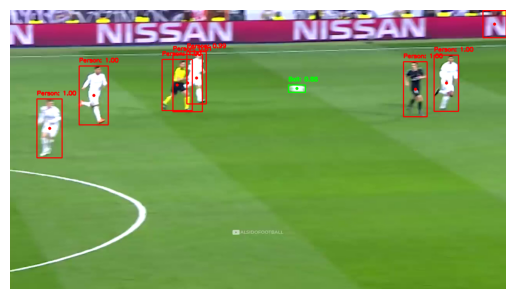

In [27]:
cap = cv2.VideoCapture('Football match.f136.mp4')
success, frame = cap.read()
if success:
    tracker = SportsTracker()
    processed_frame = tracker.process_frame(frame)
    # convert to rgb for matplotlib
    plt.imshow(processed_frame)
    plt.axis('off')
    plt.show()
cap.release()

I read the first frame from the video, process it using the `SportsTracker`, and display the result using `matplotlib`. This allows us to see how the model detects and tracks the players and the soccer ball.

**Expected Output:**

- The displayed frame will show players and the soccer ball with colored bounding boxes.
- The labels "Person" and "Ball" will appear above the boxes with their respective confidence scores.
  
**Understanding the single frame output**

- Red Bounding Boxes: These highlight the detected players on the field.
- Green Bounding Boxes: This box encloses the soccer ball.
- Confidence Scores: Higher scores indicate greater confidence in the detection.
- Tracking Points: They show how the Kalman Filter predicts the object's position, which can help when the object is temporarily occluded or moves erratically.

**Understanding the perfromance of the tracking**
- The Kalman Filter may not perfectly track every object due to rapid movements or occlusions.
- Objects entering or leaving the frame are assigned new trackers, which might result in different IDs if extended tracking isn't implemented.
- The tracking points can lag slightly behind the bounding boxes due to prediction and update steps.

**What could be improved**
- Handling Occlussion: Enhancing the Kalman Filter parameters to better handle occlusions.
- Multiple Object Tracking (MOT): Integrating algorithms like Deep SORT (covered in Task 2) can improve tracking performance.


### Conclusion of Task 1

The output video for Task 1 demonstrates the application of Faster R-CNN for object detection and basic tracking using Kalman Filters. It visually represents how the model identifies and tracks players and the soccer ball in a sports setting, which is being used to build upon for more advanced tracking techniques explored in Task 2.

## Here is the video output of task 1: [Task 1 Output Video](https://drive.google.com/file/d/14UhNF3MDlOqWSr2Qt-C8TGVCBf-oHnfg/view?usp=share_link)
---

# Task 2: Deep SORT Multi-Object Tracking
---

### What is Deep SORT?

**Deep SORT** stands for "Deep Simple Online and Realtime Tracking" and is an advanced multi-object tracking algorithm that builds on the original SORT (Simple Online and Realtime Tracking) algorithm. Deep SORT enhances SORT by using appearance information to maintain object identities across video frames, making it more robust and effective for tracking objects, especially in complex scenarios.


### Why Use Deep SORT?

1. **Maintaining Object Identity**: One of the biggest challenges in multi-object tracking is consistently identifying objects across frames, especially when they move, overlap, or become temporarily occluded. Deep SORT uses appearance features to help maintain the identity of objects.
2. **Handling Occlusions**: Objects in videos often overlap or get occluded by other objects. Deep SORT can handle these situations better than traditional tracking methods by combining motion and appearance cues.
3. **Efficiency**: Despite being more advanced than SORT, Deep SORT is still efficient and can run in near real-time on powerful GPUs, making it suitable for applications like surveillance, autonomous driving, and sports analytics.


### How Does Deep SORT Work?

Deep SORT uses a combination of motion models (Kalman Filters) and appearance features (extracted using a deep neural network) to track objects over time. Here’s a breakdown of how it works:

1. **Object Detection**: Deep SORT relies on an external object detection model (e.g., YOLOv5 or Faster R-CNN) to detect objects in each frame. The detected objects are represented by bounding boxes and confidence scores.
2. **Feature Extraction**: Deep SORT uses a pre-trained deep neural network to extract appearance features from the detected objects. These features are used to match objects across frames, even if they move or change orientation.
3. **Data Association**: To track objects, Deep SORT uses the **Hungarian Algorithm** to match detections to existing tracks based on a cost matrix. The cost matrix is computed using both motion (Kalman Filter predictions) and appearance features (feature vectors).
4. **Kalman Filter for Motion Prediction**: Each tracked object has an associated Kalman Filter that predicts the object's next position based on its current state. When a new detection is made, the Kalman Filter updates the object's state to maintain smooth and consistent tracking.
5. **Managing Tracks**: Deep SORT manages the lifecycle of tracks. It initializes new tracks for unmatched detections, updates existing tracks, and deletes tracks if an object hasn't been detected for a while.


### Key Components of Deep SORT

1. **Kalman Filter**: This mathematical model predicts an object's next position based on its current state and updates the prediction when new measurements are available. The Kalman Filter helps handle noise in the detections and provides smooth tracking.
2. **Hungarian Algorithm**: This algorithm is used for **data association**, which means matching detected objects to existing tracks in the most optimal way. It minimizes the total cost of assigning detections to tracks.
3. **Appearance Features**: Deep SORT extracts appearance features from detected objects using a deep neural network. These features help the algorithm identify objects even when their motion alone isn't reliable (e.g., when objects move erratically or get occluded).


### Uses of Deep SORT

1. **Sports Analytics**: Tracking players and the ball in sports videos to analyze strategies, player movements, or ball trajectories.
2. **Surveillance and Security**: Monitoring people or vehicles in public spaces, where consistent tracking is needed to identify suspicious activities or unusual behavior.
3. **Autonomous Vehicles**: Tracking pedestrians, other vehicles, and obstacles to ensure safe navigation.
4. **Crowd Analysis**: Understanding crowd dynamics by tracking people in crowded areas, useful for event management or safety analysis.
5. **Robotics**: Enabling robots to track and interact with moving objects in their environment.


### Why We Chose Deep SORT for Sports Analytics

For our sports analytics project, Deep SORT is an ideal choice because:
- **Robustness**: In a dynamic sports setting, players and the ball often move rapidly, overlap, and become occluded. Deep SORT's use of appearance features makes it more robust for such challenging scenarios.
- **Multi-Object Tracking**: Sports videos involve tracking multiple players simultaneously, and Deep SORT efficiently manages multiple tracks.
- **Smooth and Consistent Tracking**: The Kalman Filter ensures smooth tracking, which is essential for analyzing player movements and strategies.


### Practical Example in the assignment

- **Tracking Players**: Each player is detected allowing us to track their movement and interactions over time.
- **Tracking the Ball**: The soccer ball is tracked separately, providing insights into game dynamics, such as passes and goal attempts.
- **Handling Occlusions**: If players overlap or temporarily disappear from view, Deep SORT can use appearance and motion information to continue tracking them once they reappear.


### Advantages of Deep SORT

1. **Robust Tracking**: By combining motion and appearance features, Deep SORT can maintain object identities even when objects overlap, move unpredictably, or temporarily disappear from view.
2. **Near Real-Time Performance**: When paired with efficient object detectors like YOLOv5, Deep SORT can operate in near real-time, making it suitable for applications requiring immediate results.
3. **Reduced Identity Switching**: The use of appearance features reduces the chances of objects being mistakenly assigned new identities when they overlap or become occluded.


### Disadvantages of Deep SORT

1. **Dependency on Object Detection**: Deep SORT requires a reliable object detection model to work well. If the detector fails to detect an object in some frames, the tracker may lose that object.
2. **Computationally Intensive**: Extracting appearance features and running the Kalman Filter for multiple objects can be computationally expensive, especially on less powerful hardware.
3. **Potential Identity Switching**: Although reduced, identity switching can still occur, particularly when objects look very similar or if the appearance features aren't reliable.

## Installing Necessary Libraries and Downloading Models

First, I'll install the required libraries for Deep SORT and download the pre-trained models.

In [29]:
!pip install filterpy scikit-learn lap
!wget https://github.com/Qidian213/deep_sort_yolov3/raw/master/model_data/mars-small128.pb
!git clone https://github.com/ultralytics/yolov5.git
!pip install git+https://github.com/ultralytics/yolov5.git
!pip install tensorflow==1.15
!pip install scipy
!pip install torch torchvision
!pip install ultralytics

--2024-11-18 02:19:24--  https://github.com/Qidian213/deep_sort_yolov3/raw/master/model_data/mars-small128.pb
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Qidian213/deep_sort_yolov3/master/model_data/mars-small128.pb [following]
--2024-11-18 02:19:24--  https://raw.githubusercontent.com/Qidian213/deep_sort_yolov3/master/model_data/mars-small128.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244410 (11M) [application/octet-stream]
Saving to: 'mars-small128.pb.1'

mars-small128.pb.1  100%[===================>]  10.72M  --.-KB/s    in 0.1s    

2024-11-18 02:19:25 (71.6 MB/s) - 'mars-small

- `filterpy`: For implementing Kalman Filters.
- `scikit-learn`: Provides metrics and algorithms.
- `lap`: For solving the Linear Assignment Problem (Hungarian Algorithm).
- `tensorflow==1.15`: Required for the Deep SORT feature extractor model.
- `scipy`: For scientific computations.
- `torch` and `torchvision`: For deep learning models.
- Downloaded `mars-small128.pb`: The pre-trained feature extractor model.
- Cloned `yolov5`: For object detection.

## Importing Libraries:

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
import sys
import torch
import numpy as np
import cv2
from tqdm import tqdm
import scipy.linalg
from scipy.optimize import linear_sum_assignment

I use TensorFlow 1.x compatibility mode for the feature extractor model. I also import other libraries for image processing, numerical computations, and optimization.

## Setting Up the GPU:

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Importing the YOLOv5 Model

I import the YOLO model from the `ultralytics` package.

In [32]:
from ultralytics import YOLO

## Implementing Deep SORT Components

### Detection Class

The `Detection` class represents a single detection with its bounding box, confidence score, class name, and feature vector.

In [ ]:
class Detection:
    def __init__(self, tlwh, confidence, class_name, feature):
        self.tlwh = np.asarray(tlwh, dtype=np.float32)
        self.confidence = float(confidence)
        self.class_name = class_name
        self.feature = np.asarray(feature, dtype=np.float32)

    def get_class(self):
        return self.class_name

    def to_tlbr(self):
        """Convert bounding box to format `(min x, min y, max x, max y)`."""
        ret = self.tlwh.copy()
        ret[2:] += ret[:2]
        return ret

    def to_xyah(self):
        """Convert bounding box to format `(center x, center y, aspect ratio, height)`."""
        ret = self.tlwh.copy()
        ret[:2] += ret[2:] / 2  
        ret[2] = ret[2] / ret[3] 
        return ret

The `Detection` class provides methods to convert bounding box formats, which are essential for the tracking algorithm.

## KalmanFilter Class

Implementing the `KalmanFilter` class, which handles the state transition, measurement update, and computation of gating distances for data association.

In [ ]:
class KalmanFilter:
    """
    A simple Kalman filter for tracking bounding boxes in image space.
    """

    def __init__(self):
        ndim, dt = 4, 1.

        self._motion_mat = np.eye(2 * ndim, 2 * ndim)
        for i in range(ndim):
            self._motion_mat[i, ndim + i] = dt
        self._update_mat = np.eye(ndim, 2 * ndim)

        self._std_weight_position = 1. / 20
        self._std_weight_velocity = 1. / 160

    def initiate(self, measurement):
        """Create track from unassociated measurement."""
        mean_pos = measurement
        mean_vel = np.zeros_like(mean_pos)
        mean = np.r_[mean_pos, mean_vel]

        std = [
            2 * self._std_weight_position * measurement[3],  # x
            2 * self._std_weight_position * measurement[3],  # y
            1e-2,  # a
            2 * self._std_weight_position * measurement[3],  # h
            10 * self._std_weight_velocity * measurement[3],  # x_dot
            10 * self._std_weight_velocity * measurement[3],  # y_dot
            1e-5,  # a_dot
            10 * self._std_weight_velocity * measurement[3]]  # h_dot
        covariance = np.diag(np.square(std))
        return mean, covariance

    def predict(self, mean, covariance):
        """Run Kalman filter prediction step."""
        std_pos = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-2,
            self._std_weight_position * mean[3]]
        std_vel = [
            self._std_weight_velocity * mean[3],
            self._std_weight_velocity * mean[3],
            1e-5,
            self._std_weight_velocity * mean[3]]
        motion_cov = np.diag(np.square(np.r_[std_pos, std_vel]))

        mean = np.dot(self._motion_mat, mean)
        covariance = np.linalg.multi_dot((
            self._motion_mat, covariance, self._motion_mat.T)) + motion_cov

        return mean, covariance

    def project(self, mean, covariance):
        """Project state distribution to measurement space."""
        std = [
            self._std_weight_position * mean[3],
            self._std_weight_position * mean[3],
            1e-1,
            self._std_weight_position * mean[3]]
        innovation_cov = np.diag(np.square(std))

        mean = np.dot(self._update_mat, mean)
        covariance = np.linalg.multi_dot((
            self._update_mat, covariance, self._update_mat.T))
        return mean, covariance + innovation_cov

    def update(self, mean, covariance, measurement):
        """Run Kalman filter correction step."""
        projected_mean, projected_cov = self.project(mean, covariance)

        chol_factor, lower = scipy.linalg.cho_factor(
            projected_cov, lower=True, check_finite=False)
        kalman_gain = scipy.linalg.cho_solve(
            (chol_factor, lower), np.dot(covariance, self._update_mat.T).T,
            check_finite=False).T
        innovation = measurement - projected_mean

        new_mean = mean + np.dot(innovation, kalman_gain.T)
        new_covariance = covariance - np.linalg.multi_dot((
            kalman_gain, projected_cov, kalman_gain.T))
        return new_mean, new_covariance

    def gating_distance(self, mean, covariance, measurements,
                        only_position=False):
        """Compute gating distance between state distribution and measurements."""
        mean, covariance = self.project(mean, covariance)
        if only_position:
            mean, covariance = mean[:2], covariance[:2, :2]
            measurements = measurements[:, :2]

        cholesky_factor = np.linalg.cholesky(covariance)
        d = measurements - mean
        z = scipy.linalg.solve_triangular(
            cholesky_factor, d.T, lower=True, check_finite=False,
            overwrite_b=True)
        squared_maha = np.sum(z * z, axis=0)
        return squared_maha

The `KalmanFilter` class implements the Kalman Filter for tracking bounding boxes in image space. It includes methods for initializing the filter with a measurement, predicting the next state, updating the state with a new measurement, projecting the state to measurement space, and computing the gating distance for data association.

- **Initialization**: Sets up the motion and observation matrices and defines the uncertainties in position and velocity.
- **`initiate`**: Creates a new track from an initial measurement.
- **`predict`**: Predicts the next state based on the current state and the motion model.
- **`update`**: Updates the state estimate with a new measurement.
- **`project`**: Projects the state estimate into measurement space.
- **`gating_distance`**: Computes the Mahalanobis distance between the predicted state and the measurements, which is used for gating in data association.

## Kalman Filter Equations

The **Kalman Filter** is a mathematical model used in Deep SORT to predict and update the state of an object. It operates in two main steps: **Prediction** and **Update**.

### 1. **Prediction Step**
The Kalman Filter predicts the next state of the object using the current state and the motion model.

- **State Prediction**:
  \[$
  \hat{x}_k = F \cdot x_{k-1} + B \cdot u_{k-1}
  $\]
  - \($ \hat{x}_k $\): Predicted state at time \($ k $\)
  - \($ F $\): State transition matrix
  - \($ x_{k-1} $\): Previous state
  - \($ B $\): Control input matrix (if applicable)
  - \($ u_{k-1} $\): Control input (if applicable)

- **Covariance Prediction**:
  \[$
  \hat{P}_k = F \cdot P_{k-1} \cdot F^T + Q
  $\]
  - \($ \hat{P}_k $\): Predicted covariance matrix
  - \($ P_{k-1} $\): Previous covariance matrix
  - \($ Q $\): Process noise covariance matrix

### 2. **Update Step**
The Kalman Filter updates the state estimate with the new measurement, adjusting for measurement noise.

- **Innovation**:
  \[$
  y_k = z_k - H \cdot \hat{x}_k
  $\]
  - \($ y_k$ \): Measurement residual (innovation)
  - \($ z_k $\): Measurement at time \($ k $\)
  - \($ H $\): Measurement matrix

- **Innovation Covariance**:
  \[$
  S_k = H \cdot \hat{P}_k \cdot H^T + R
  $\]
  - \($ S_k $\): Innovation covariance
  - \($ R $\): Measurement noise covariance matrix

- **Kalman Gain**:
  \[$
  K_k = \hat{P}_k \cdot H^T \cdot S_k^{-1}
  $\]
  - \($ K_k $\): Kalman Gain, used to update the state estimate

- **State Update**:
  \[$
  x_k = \hat{x}_k + K_k \cdot y_k
  $\]
  - \($ x_k $\): Updated state estimate

- **Covariance Update**:
  \[$
  P_k = (I - K_k \cdot H) \cdot \hat{P}_k
  $\]
  - \($ P_k $\): Updated covariance matrix
  - \($ I $\): Identity matrix

These equations allow the filter to predict the next state of an object and update its estimate based on new measurements, taking into account uncertainties in both the process and the measurements.

## Key Components of the Architecture

In this sports analytics project, we use a combination of object detection and tracking algorithms to analyze video footage. The architecture involves two main components: **Faster R-CNN** for object detection and **Deep SORT** for multi-object tracking. Let's summarize the core components:

### 1. **Object Detection: Faster R-CNN**
- **Faster R-CNN** is a state-of-the-art object detection model that provides high accuracy and efficiency.
- **Key Features**:
  - **Region Proposal Network (RPN)**: Generates candidate object regions quickly, reducing the search space for objects.
  - **Two-Stage Detection**: The RPN proposes regions, and a separate network classifies and refines these regions.
  - **High Accuracy**: Ideal for tasks that require precise object detection, such as identifying players and a ball in sports videos.


### 2. **Multi-Object Tracking: Deep SORT**
- **Deep SORT** is an extension of the SORT algorithm that uses appearance features and motion models to track objects over time.
- **Key Components**:
  - **Object Detection Model**: Detects objects in each frame (we use YOLOv5 for efficient detection).
  - **Feature Extraction**: A deep neural network extracts appearance features from each detected object to maintain consistent identities.
  - **Data Association**: The Hungarian Algorithm is used to match detections with existing tracks, minimizing the total cost.
  - **Kalman Filter**: Predicts the future position of objects and updates this prediction when new measurements are available.
  - **Managing Tracks**: Initializes new tracks, updates existing ones, and deletes tracks that haven't been detected for a while.

## Summary of Kalman Filter Usage
- The Kalman Filter smooths object trajectories by predicting their future positions and correcting these predictions with new measurements.
- It accounts for uncertainties in both the object's motion (process noise) and the detection (measurement noise).
- This approach ensures stable and consistent tracking, even when objects move unpredictably or are temporarily occluded.


This architecture, combining Faster R-CNN and Deep SORT, provides robust and efficient object detection and tracking, making it ideal for analyzing sports footage and other complex scenes involving multiple moving objects.

---
## What is the Hungarian Algorithm?

The **Hungarian Algorithm** is a mathematical optimization method used to solve the **assignment problem** efficiently. In the context of multi-object tracking, the assignment problem refers to matching **detected objects** (e.g., players or the ball in a sports video) to **existing tracks** in a way that minimizes the total cost. This cost is typically based on the distance (in terms of location and/or appearance features) between detected objects and the predicted positions of existing tracks.

### Why Do We Need the Hungarian Algorithm in Tracking?

In a video sequence, we detect multiple objects in each frame using an object detection model. However, to track these objects over time, we need to decide which detected object in the current frame corresponds to which existing track from previous frames. This is where the Hungarian Algorithm comes in. It helps us make these assignments optimally so that the overall "cost" (or difference) between detections and tracks is minimized.

### How Does the Hungarian Algorithm Work?

The Hungarian Algorithm works on a **cost matrix**. Let's break down the process:

1. **Cost Matrix Creation**:
   - The algorithm starts by creating a cost matrix, where each element represents the "cost" of assigning a detected object to an existing track. 
   - In our case, this cost can be the **distance** between the detected object's bounding box and the predicted position of an existing track. It could also include an appearance feature distance (like cosine similarity).

2. **Finding the Optimal Assignment**:
   - The Hungarian Algorithm then tries to find an assignment where each detected object is matched to an existing track (and vice versa) such that the **total cost** is minimized.
   - It ensures that each object is assigned to at most one track, and each track is assigned to at most one object.

3. **Handling Unmatched Detections and Tracks**:
   - If there are more detections than tracks, some detections will remain unmatched, which could lead to the creation of new tracks.
   - If there are more tracks than detections, some tracks will not be updated and might be marked for deletion if they continue to be unmatched over multiple frames.


### Step-by-Step Example

Imagine a simplified scenario where we have 3 detected objects and 3 existing tracks. We create a cost matrix that looks like this:

|            | Track 1 | Track 2 | Track 3 |
|------------|---------|---------|---------|
| Detection 1|   0.2   |   0.5   |   0.8   |
| Detection 2|   0.6   |   0.1   |   0.4   |
| Detection 3|   0.7   |   0.3   |   0.2   |

- Each element in the matrix represents the cost of matching a detection to a track.
- Our goal is to find an assignment (one detection to one track) that minimizes the overall cost. 

### What the Hungarian Algorithm Does:

1. It finds the optimal way to pair detections with tracks so that the sum of the selected costs (from the cost matrix) is as **low as possible**.
2. In our example, an optimal assignment could be:
   - **Detection 1** to **Track 1** (cost = 0.2)
   - **Detection 2** to **Track 2** (cost = 0.1)
   - **Detection 3** to **Track 3** (cost = 0.2)
3. The total cost for this assignment would be 0.2 + 0.1 + 0.2 = **0.5**, which is minimized.

### Uses in Multi-Object Tracking

In our project, the Hungarian Algorithm plays a crucial role in **data association**, which means matching new detections to existing tracks:
- It ensures that the objects are tracked **consistently** over time, even if they move or overlap.
- The algorithm helps handle complex scenes where multiple objects are present, reducing the chances of identity switching (where the track ID of an object changes incorrectly).


### Advantages of Using the Hungarian Algorithm

1. **Optimal Assignment**: It guarantees that the assignment is the most cost-effective, meaning the total distance (or cost) between detections and tracks is minimized.
2. **Efficiency**: The algorithm is computationally efficient and works well even when there are many objects to track, making it suitable for real-time applications.
3. **Handles Complex Scenarios**: It can manage cases where some detections do not have corresponding tracks and vice versa, making it versatile for different tracking situations.


To put it plainly, the Hungarian Algorithm is a critical part of the Deep SORT tracking pipeline. It helps ensure that objects are matched to their correct tracks across video frames in an optimal way, minimizing errors and keeping the tracking system robust and efficient. This is especially important in sports analytics, where consistent tracking of players and the ball is crucial for accurate performance analysis.

Referred to [this implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html)

---

In [35]:
def linear_assignment_fn(cost_matrix, max_cost=1e+5):
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    matches = []
    unmatched_a = []
    unmatched_b = []
    for i in range(cost_matrix.shape[0]):
        if i not in row_ind:
            unmatched_a.append(i)
    for j in range(cost_matrix.shape[1]):
        if j not in col_ind:
            unmatched_b.append(j)
    for i, j in zip(row_ind, col_ind):
        if cost_matrix[i, j] > max_cost:
            unmatched_a.append(i)
            unmatched_b.append(j)
        else:
            matches.append((i, j))
    return matches, unmatched_a, unmatched_b

def iou(bbox, candidates):
    """Compute intersection over union."""
    bbox_tl, bbox_br = bbox[:2], bbox[:2] + bbox[2:]
    candidates_tl = candidates[:, :2]
    candidates_br = candidates[:, :2] + candidates[:, 2:]

    tl = np.maximum(bbox_tl, candidates_tl)
    br = np.minimum(bbox_br, candidates_br)
    wh = np.maximum(0., br - tl)

    area_intersection = wh[:, 0] * wh[:, 1]
    area_bbox = bbox[2] * bbox[3]
    area_candidates = candidates[:, 2] * candidates[:, 3]
    return area_intersection / (area_bbox + area_candidates - area_intersection)

These helper functions are used for data association between detections and existing tracks.

- **`linear_assignment_fn`**: Implements the Hungarian Algorithm (using `linear_sum_assignment` from `scipy.optimize`) to find the optimal assignment between tracks and detections based on a cost matrix.

- **`iou`**: Calculates the Intersection over Union (IoU) between a bounding box and a set of candidate boxes. This is used as a cost metric for matching when appearance features are not reliable.

### NearestNeighborDistanceMetric Class

The `NearestNeighborDistanceMetric` class computes the distance between the feature vectors of detections and the stored features of tracks. It helps in matching detections to existing tracks based on appearance features.

In [36]:
class NearestNeighborDistanceMetric:
    """
    A nearest neighbor distance metric that, for each target, returns
    the closest distance to any sample that has been observed so far.
    """
    def __init__(self, metric, matching_threshold, budget=None):
        self.matching_threshold = matching_threshold
        self.budget = budget
        self.samples = {}
        if metric == "euclidean":
            self._metric = self._nn_euclidean_distance
        else:
            self._metric = self._nn_cosine_distance

    def partial_fit(self, features, targets, active_targets):
        """Update the distance metric with new data."""
        for feature, target in zip(features, targets):
            self.samples.setdefault(target, []).append(feature)
            if self.budget is not None:
                self.samples[target] = self.samples[target][-self.budget:]
        # Remove samples for inactive targets
        self.samples = {k: self.samples[k] for k in active_targets}

    def distance(self, features, targets):
        """Compute distance between features and targets."""
        cost_matrix = np.zeros((len(targets), len(features)))
        for i, target in enumerate(targets):
            cost_matrix[i, :] = self._metric(self.samples[target], features)
        return cost_matrix

    def _nn_euclidean_distance(self, x, y):
        """Compute nearest neighbor Euclidean distance."""
        distances = np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], axis=2)
        return distances.min(axis=0)

    def _nn_cosine_distance(self, x, y):
        """Compute nearest neighbor cosine distance."""
        x = x / np.linalg.norm(x, axis=1, keepdims=True)
        y = y / np.linalg.norm(y, axis=1, keepdims=True)
        distances = 1. - np.dot(x, y.T)
        return distances.min(axis=0)

This class provides a metric to measure the distance between detections and tracks based on appearance features. It supports both Euclidean and cosine distances.

- **`partial_fit`**: Updates the stored features for active tracks.
- **`distance`**: Computes the cost matrix between detections and tracks.
- **`_nn_euclidean_distance`** and **`_nn_cosine_distance`**: Helper methods to compute distances.

### Track and Tracker Classes

The `Track` class represents an individual object being tracked, and the `Tracker` class manages multiple tracks and performs data association using the Hungarian Algorithm.

In [37]:
class Track:
    """
    A single target track with state space `(x, y, a, h)` and associated velocities.
    """
    def __init__(self, mean, covariance, track_id, n_init, max_age,
                 feature=None, class_name=None):
        self.mean = mean
        self.covariance = covariance
        self.track_id = track_id
        self.hits = 1
        self.age = 1
        self.time_since_update = 0

        self.state = 'Tentative'
        self.features = []
        if feature is not None:
            self.features.append(feature)

        self._n_init = n_init
        self._max_age = max_age
        self.class_name = class_name

    def predict(self, kf):
        """Propagate the state distribution one time step forward."""
        self.mean, self.covariance = kf.predict(self.mean, self.covariance)
        self.age += 1
        self.time_since_update += 1

    def update(self, kf, detection):
        """Perform Kalman filter measurement update step and update the feature cache."""
        self.mean, self.covariance = kf.update(
            self.mean, self.covariance, detection.to_xyah())
        self.features.append(detection.feature)

        self.hits += 1
        self.time_since_update = 0
        if self.state == 'Tentative' and self.hits >= self._n_init:
            self.state = 'Confirmed'

    def mark_missed(self):
        """Mark this track as missed."""
        if self.state == 'Tentative':
            self.state = 'Deleted'
        elif self.time_since_update > self._max_age:
            self.state = 'Deleted'

    def is_tentative(self):
        return self.state == 'Tentative'

    def is_confirmed(self):
        return self.state == 'Confirmed'

    def is_deleted(self):
        return self.state == 'Deleted'

    def to_tlwh(self):
        """Get current position in bounding box format `(top left x, top left y, width, height)`."""
        ret = self.mean[:4].copy()
        ret[2] *= ret[3]  # converting aspect ratio to width
        ret[:2] -= ret[2:] / 2  # converting center coordinates to top-left
        return ret

    def to_tlbr(self):
        """Get current position in bounding box format `(min x, min y, max x, max y)`."""
        ret = self.to_tlwh()
        ret[2:] += ret[:2]  # converting width and height to bottom-right coordinates
        return ret

    def get_class(self):
        return self.class_name

In [ ]:
class Tracker:
    """
    This is the multi-target tracker.
    """
    def __init__(self, metric, max_iou_distance=0.7, max_age=30, n_init=3):
        self.metric = metric
        self.max_iou_distance = max_iou_distance
        self.max_age = max_age
        self.n_init = n_init

        self.kf = KalmanFilter()
        self.tracks = []
        self._next_id = 1

    def predict(self):
        """Propagate track state distributions one time step forward."""
        for track in self.tracks:
            track.predict(self.kf)

    def update(self, detections):
        """Perform measurement update and track management."""
        matches, unmatched_tracks, unmatched_detections = self._match(detections)

        for track_idx, detection_idx in matches:
            self.tracks[track_idx].update(
                self.kf, detections[detection_idx])

        for track_idx in unmatched_tracks:
            self.tracks[track_idx].mark_missed()

        for detection_idx in unmatched_detections:
            self._initiate_track(detections[detection_idx])

        self.tracks = [t for t in self.tracks if not t.is_deleted()]

        active_targets = [t.track_id for t in self.tracks if t.is_confirmed()]
        features, targets = [], []
        for track in self.tracks:
            if not track.is_confirmed():
                continue
            features.extend(track.features)
            targets.extend([track.track_id] * len(track.features))
            track.features = []
        self.metric.partial_fit(np.asarray(features), np.asarray(targets), active_targets)

    def _match(self, detections):
        def gated_metric(tracks, dets, track_indices, detection_indices):
            features = np.array([dets[i].feature for i in detection_indices])
            targets = np.array([tracks[i].track_id for i in track_indices])
            cost_matrix = self.metric.distance(features, targets)
            cost_matrix = self._gate_cost_matrix(cost_matrix, tracks, dets, track_indices, detection_indices)
            return cost_matrix

        confirmed_tracks = [i for i, t in enumerate(self.tracks) if t.is_confirmed()]
        unconfirmed_tracks = [i for i, t in enumerate(self.tracks) if not t.is_confirmed()]

        matches_a, unmatched_tracks_a, unmatched_detections = self._min_cost_matching(
            gated_metric, self.tracks, detections, confirmed_tracks)

        iou_track_candidates = unconfirmed_tracks + [
            k for k in unmatched_tracks_a if self.tracks[k].time_since_update == 1]
        unmatched_tracks_a = [
            k for k in unmatched_tracks_a if self.tracks[k].time_since_update != 1]

        matches_b, unmatched_tracks_b, unmatched_detections = self._min_cost_matching(
            self._iou_cost, self.tracks, detections, iou_track_candidates, unmatched_detections)

        matches = matches_a + matches_b
        unmatched_tracks = list(set(unmatched_tracks_a + unmatched_tracks_b))
        return matches, unmatched_tracks, unmatched_detections

    def _min_cost_matching(self, distance_metric, tracks, detections, track_indices, detection_indices=None):
        if detection_indices is None:
            detection_indices = list(range(len(detections)))
        if len(detection_indices) == 0 or len(track_indices) == 0:
            return [], track_indices, detection_indices  

        cost_matrix = distance_metric(tracks, detections, track_indices, detection_indices)
        cost_matrix[cost_matrix > self.metric.matching_threshold] = self.metric.matching_threshold + 1e-5
        matches, unmatched_tracks, unmatched_detections = linear_assignment_fn(cost_matrix)
        return matches, unmatched_tracks, unmatched_detections

    def _gate_cost_matrix(self, cost_matrix, tracks, detections, track_indices, detection_indices):
        gating_threshold = 9.4877  
        measurements = np.asarray([detections[i].to_xyah() for i in detection_indices])
        for row, track_idx in enumerate(track_indices):
            track = tracks[track_idx]
            gating_distance = self.kf.gating_distance(
                track.mean, track.covariance, measurements, only_position=False)
            cost_matrix[row, gating_distance > gating_threshold] = np.inf
        return cost_matrix

    def _iou_cost(self, tracks, detections, track_indices, detection_indices):
        cost_matrix = np.zeros((len(track_indices), len(detection_indices)), dtype=np.float32)
        for row, track_idx in enumerate(track_indices):
            track = tracks[track_idx]
            bbox = track.to_tlwh()
            candidates = np.array([detections[i].tlwh for i in detection_indices])
            cost_matrix[row, :] = 1. - iou(bbox, candidates)
        return cost_matrix

    def _initiate_track(self, detection):
        mean, covariance = self.kf.initiate(detection.to_xyah())
        class_name = detection.get_class()
        self.tracks.append(Track(
            mean, covariance, self._next_id, self.n_init, self.max_age,
            detection.feature, class_name))
        self._next_id += 1

The `Tracker` class manages multiple `Track` objects and performs data association between detections and existing tracks.

- **`predict`**: Advances the state of each track using the Kalman Filter.
- **`update`**: Updates tracks with detections and manages track life cycles.
- **`_match`**: Performs data association in two stages: first using appearance features, then using IoU.
- **`_initiate_track`**: Initializes new tracks for unmatched detections.

### Function to Create the Encoder (Feature Extractor)

We need to create an encoder that extracts appearance features from detected bounding boxes. This is crucial for matching detections to existing tracks based on visual similarity.

In [39]:
def create_box_encoder(model_filename, batch_size=32):
    # loaing the model
    encoder = gdet_create_box_encoder(model_filename, batch_size=batch_size)
    return encoder

def gdet_create_box_encoder(model_filename, input_name="images", output_name="features", batch_size=32):
    model = tf.Graph()
    with model.as_default():
        graph_def = tf.GraphDef()
        with tf.gfile.GFile(model_filename, 'rb') as fid:
            serialized_graph = fid.read()
            graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(graph_def, name='')
    session = tf.Session(graph=model)
    input_tensor = model.get_tensor_by_name(input_name + ':0')
    output_tensor = model.get_tensor_by_name(output_name + ':0')
    image_shape = input_tensor.get_shape().as_list()[1:]

    def encoder(images, batch_size=batch_size):
        features = []
        n_batches = int(np.ceil(len(images) / batch_size))
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            end = min((batch_idx + 1) * batch_size, len(images))
            batch_images = images[start:end]
            batch_images = np.array([preprocess_image(im, image_shape) for im in batch_images])
            feed_dict = {input_tensor: batch_images}
            batch_features = session.run(output_tensor, feed_dict=feed_dict)
            features.extend(batch_features)
        return np.array(features)
    return encoder

def preprocess_image(image, image_shape):
    image = cv2.resize(image, (image_shape[1], image_shape[0]))
    image = image.astype(np.float32) / 255.0
    return image

- **`create_box_encoder`**: Loads the pre-trained model and returns an encoder function.
- **`gdet_create_box_encoder`**: Handles the loading of the TensorFlow model and defines how images are processed through it.
- **`preprocess_image`**: Resizes and normalizes images before feeding them to the model.

The encoder extracts feature vectors from image patches corresponding to detections, which are then used for matching in the tracker.

### Implementing the SportsTrackerWithDeepSort Class

This class integrates the YOLOv5 detector with the Deep SORT tracker. It processes each frame, extracts detections, encodes them using the feature extractor, and updates the tracker. The visualizations include bounding boxes with unique IDs assigned to each tracked object.

In [ ]:
class SportsTrackerWithDeepSort:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        self.model = self.load_yolo_model()
        self.names = self.model.names  
        self.desired_classes = {'person': 0, 'sports ball': 32}  
        self.confidence_threshold = 0.5
        self.img_size = 640  

       
        self.metric = NearestNeighborDistanceMetric("cosine", matching_threshold=0.4)
        self.tracker = Tracker(self.metric)
        
        model_filename = 'mars-small128.pb'  
        self.encoder = create_box_encoder(model_filename, batch_size=1)

    def load_yolo_model(self):
        model = YOLO('yolov5m.pt') 
        return model

    def process_frame(self, frame):
        """Process a single frame and apply Deep SORT tracking"""
        results = self.model.predict(frame, device=self.device, classes=[0, 32])
        
        result = results[0]
       
        detections = []
        boxes = result.boxes
        for box in boxes:
            x1y1x2y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()
            cls = int(box.cls[0].cpu().numpy())
            if cls in self.desired_classes.values():
                x1, y1, x2, y2 = map(int, x1y1x2y2)
                w, h = x2 - x1, y2 - y1
                bbox = [x1, y1, w, h]
                detections.append({'box': bbox, 'score': float(conf), 'class': cls})

        bbox_xywh = []
        confs = []
        classes = []
        for det in detections:
            x, y, w, h = det['box']
            x_c, y_c = x + w / 2, y + h / 2
            bbox_xywh.append([x_c, y_c, w, h])
            confs.append(det['score'])
            classes.append(det['class'])

        if bbox_xywh:
            patches = []
            for bbox in bbox_xywh:
                x, y, w, h = bbox
                x1 = int(x - w / 2)
                y1 = int(y - h / 2)
                x2 = int(x + w / 2)
                y2 = int(y + h / 2)
               
                x1 = max(0, x1)
                y1 = max(0, y1)
                x2 = min(frame.shape[1], x2)
                y2 = min(frame.shape[0], y2)
                patch = frame[y1:y2, x1:x2]
                patches.append(patch)
            features = self.encoder(patches)
           
            detections = [
                Detection(bbox, conf, cls, feat)
                for bbox, conf, cls, feat in zip(bbox_xywh, confs, classes, features)
            ]
        else:
            detections = []

        self.tracker.predict()
        self.tracker.update(detections)
        
        return self.visualize_detections(frame, self.tracker.tracks)

    def visualize_detections(self, frame, tracks):
        """Visualize tracked objects"""
        frame_copy = frame.copy()
        for track in tracks:
            if not track.is_confirmed() or track.time_since_update > 1:
                continue
            bbox = track.to_tlbr()
            x1, y1, x2, y2 = map(int, bbox)
            track_id = track.track_id
            class_id = track.get_class()
            
            color = (255, 0, 0) if class_id == 0 else (0, 255, 0) 
            
            cv2.rectangle(frame_copy, (x1, y1), (x2, y2), color, 2)
            
            label = f"ID {track_id}: {'Person' if class_id == 0 else 'Ball'}"
            cv2.putText(
                frame_copy,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                color,
                2
            )
        return frame_copy

### Explanation

This class integrates object detection and tracking:

- **`process_frame`**:
  - Runs object detection using YOLOv5.
  - Filters detections for the desired classes.
  - Prepares bounding boxes and encodes them to obtain feature vectors.
  - Updates the tracker with the new detections.
  - Visualizes the tracking results on the frame.

- **`visualize_detections`**:
  - Draws bounding boxes and labels with unique IDs for each tracked object.

### Processing the Video with Deep SORT

We update the video processing function to use the new tracker.

In [ ]:
def process_video_with_deep_sort(video_path, output_path):
    """Process the entire video file using Deep SORT"""
    tracker = SportsTrackerWithDeepSort()

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Error: Could not open video.")
                                                                                 
    # gathering vid properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    pbar = tqdm(total=total_frames, desc="Processing Frames with Deep SORT")

    while True:
        success, frame = cap.read()
        if not success:
            break
        # processing frame
        processed_frame = tracker.process_frame(frame)
        # writing frame
        out.write(processed_frame)
        pbar.update(1)

    # releasing resources
    pbar.close()
    cap.release()
    out.release()
    print("Video processing with Deep SORT completed.")

### Explanation

This function processes the video frame by frame using the `SportsTrackerWithDeepSort` class:

- Reads frames from the input video.
- Processes each frame to perform detection and tracking.
- Writes the processed frames to the output video file.

### Running the Video Processing with Deep SORT

Finally, we specify the input and output video paths and start the processing using the Deep SORT algorithm.

In [ ]:
if __name__ == "__main__":
    video_path = 'Football match.f136.mp4'  
    output_path = 'output_task2.mp4'
    process_video_with_deep_sort(video_path, output_path)

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



Processing Frames with Deep SORT:   0%|          | 0/1074 [00:00<?, ?it/s]


0: 384x640 6 persons, 79.7ms
Speed: 5.0ms preprocess, 79.7ms inference, 22.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   0%|          | 1/1074 [00:02<48:03,  2.69s/it]


0: 384x640 6 persons, 1 sports ball, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 sports ball, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   0%|          | 3/1074 [00:02<13:09,  1.36it/s]


0: 384x640 7 persons, 1 sports ball, 17.1ms
Speed: 1.5ms preprocess, 17.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 sports ball, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   0%|          | 5/1074 [00:02<06:55,  2.57it/s]


0: 384x640 7 persons, 17.0ms
Speed: 1.7ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   1%|          | 7/1074 [00:03<04:26,  4.00it/s]


0: 384x640 5 persons, 1 sports ball, 16.7ms
Speed: 1.7ms preprocess, 16.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   1%|          | 9/1074 [00:03<03:09,  5.62it/s]


0: 384x640 5 persons, 1 sports ball, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 16.4ms
Speed: 1.7ms preprocess, 16.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   1%|          | 11/1074 [00:03<02:25,  7.33it/s]


0: 384x640 4 persons, 1 sports ball, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 2 sports balls, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   1%|          | 13/1074 [00:03<01:56,  9.14it/s]


0: 384x640 3 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   1%|▏         | 15/1074 [00:03<01:36, 10.99it/s]


0: 384x640 3 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   2%|▏         | 18/1074 [00:03<01:17, 13.57it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   2%|▏         | 20/1074 [00:03<01:11, 14.71it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   2%|▏         | 22/1074 [00:03<01:07, 15.68it/s]


0: 384x640 6 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   2%|▏         | 24/1074 [00:03<01:05, 15.93it/s]


0: 384x640 5 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 sports ball, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   2%|▏         | 26/1074 [00:04<01:05, 16.06it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   3%|▎         | 28/1074 [00:04<01:03, 16.57it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   3%|▎         | 30/1074 [00:04<01:02, 16.83it/s]


0: 384x640 5 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   3%|▎         | 32/1074 [00:04<01:02, 16.71it/s]


0: 384x640 5 persons, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   3%|▎         | 34/1074 [00:04<01:01, 16.87it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   3%|▎         | 36/1074 [00:04<01:00, 17.18it/s]


0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   4%|▎         | 38/1074 [00:04<00:59, 17.49it/s]


0: 384x640 4 persons, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   4%|▍         | 41/1074 [00:04<00:56, 18.28it/s]


0: 384x640 5 persons, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   4%|▍         | 43/1074 [00:05<00:56, 18.24it/s]


0: 384x640 4 persons, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   4%|▍         | 45/1074 [00:05<00:55, 18.50it/s]


0: 384x640 3 persons, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   4%|▍         | 47/1074 [00:05<00:54, 18.81it/s]


0: 384x640 3 persons, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   5%|▍         | 49/1074 [00:05<00:54, 18.74it/s]


0: 384x640 3 persons, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   5%|▍         | 52/1074 [00:05<00:52, 19.45it/s]


0: 384x640 3 persons, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   5%|▌         | 55/1074 [00:05<00:51, 19.81it/s]


0: 384x640 3 persons, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   5%|▌         | 58/1074 [00:05<00:50, 20.19it/s]


0: 384x640 1 person, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.1ms
Speed: 1.5ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.1ms
Speed: 1.4ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   6%|▌         | 61/1074 [00:05<00:46, 21.62it/s]


0: 384x640 1 person, 16.1ms
Speed: 1.5ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 1.5ms preprocess, 15.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 1.5ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   6%|▌         | 64/1074 [00:06<00:43, 22.98it/s]


0: 384x640 1 person, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 1.5ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   6%|▌         | 67/1074 [00:06<00:42, 23.96it/s]


0: 384x640 1 person, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   7%|▋         | 70/1074 [00:06<00:41, 23.91it/s]


0: 384x640 1 person, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.4ms
Speed: 2.1ms preprocess, 20.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.9ms
Speed: 2.7ms preprocess, 19.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   7%|▋         | 73/1074 [00:06<00:48, 20.63it/s]


0: 384x640 1 person, 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.2ms
Speed: 2.1ms preprocess, 21.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.6ms
Speed: 2.6ms preprocess, 20.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   7%|▋         | 76/1074 [00:06<00:53, 18.73it/s]


0: 384x640 1 person, 19.6ms
Speed: 2.5ms preprocess, 19.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.4ms
Speed: 1.9ms preprocess, 19.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   7%|▋         | 78/1074 [00:06<00:55, 17.92it/s]


0: 384x640 1 person, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.0ms
Speed: 2.4ms preprocess, 19.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   7%|▋         | 80/1074 [00:06<00:57, 17.40it/s]


0: 384x640 1 person, 19.5ms
Speed: 2.5ms preprocess, 19.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.9ms
Speed: 2.0ms preprocess, 18.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   8%|▊         | 82/1074 [00:07<00:58, 16.90it/s]


0: 384x640 1 person, 19.7ms
Speed: 2.1ms preprocess, 19.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.4ms
Speed: 2.5ms preprocess, 20.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   8%|▊         | 84/1074 [00:07<01:00, 16.42it/s]


0: 384x640 1 person, 18.9ms
Speed: 2.4ms preprocess, 18.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   8%|▊         | 86/1074 [00:07<01:01, 16.06it/s]


0: 384x640 1 person, 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.2ms
Speed: 2.4ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   8%|▊         | 88/1074 [00:07<01:01, 16.07it/s]


0: 384x640 1 person, 20.9ms
Speed: 2.3ms preprocess, 20.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.7ms
Speed: 2.1ms preprocess, 18.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   8%|▊         | 90/1074 [00:07<01:01, 16.00it/s]


0: 384x640 1 person, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.6ms
Speed: 2.6ms preprocess, 19.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▊         | 92/1074 [00:07<01:01, 16.02it/s]


0: 384x640 1 person, 20.1ms
Speed: 2.3ms preprocess, 20.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▉         | 94/1074 [00:07<01:01, 15.93it/s]


0: 384x640 1 person, 19.6ms
Speed: 1.8ms preprocess, 19.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 2.4ms preprocess, 20.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▉         | 96/1074 [00:07<01:01, 16.00it/s]


0: 384x640 1 person, 19.6ms
Speed: 2.4ms preprocess, 19.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.9ms
Speed: 2.1ms preprocess, 21.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▉         | 98/1074 [00:08<01:02, 15.72it/s]


0: 384x640 1 person, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.3ms
Speed: 2.6ms preprocess, 20.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▉         | 100/1074 [00:08<01:01, 15.71it/s]


0: 384x640 1 person, 20.0ms
Speed: 2.5ms preprocess, 20.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.5ms
Speed: 1.9ms preprocess, 20.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:   9%|▉         | 102/1074 [00:08<01:02, 15.62it/s]


0: 384x640 1 person, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  10%|▉         | 104/1074 [00:08<01:00, 15.95it/s]


0: 384x640 1 person, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.7ms
Speed: 2.0ms preprocess, 19.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  10%|▉         | 106/1074 [00:08<01:01, 15.70it/s]


0: 384x640 1 person, 19.6ms
Speed: 2.0ms preprocess, 19.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  10%|█         | 108/1074 [00:08<01:00, 15.98it/s]


0: 384x640 1 person, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.4ms
Speed: 2.1ms preprocess, 20.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  10%|█         | 110/1074 [00:08<01:00, 16.01it/s]


0: 384x640 1 person, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.2ms
Speed: 2.0ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  10%|█         | 112/1074 [00:08<01:00, 16.03it/s]


0: 384x640 1 person, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.7ms
Speed: 1.9ms preprocess, 19.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  11%|█         | 114/1074 [00:09<00:57, 16.62it/s]


0: 384x640 1 person, 19.3ms
Speed: 2.2ms preprocess, 19.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  11%|█         | 116/1074 [00:09<00:59, 15.99it/s]


0: 384x640 1 person, 20.7ms
Speed: 2.0ms preprocess, 20.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  11%|█         | 118/1074 [00:09<01:00, 15.81it/s]


0: 384x640 1 person, 19.6ms
Speed: 2.2ms preprocess, 19.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 23.2ms
Speed: 2.5ms preprocess, 23.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  11%|█         | 120/1074 [00:09<01:03, 15.10it/s]


0: 384x640 1 person, 22.3ms
Speed: 2.7ms preprocess, 22.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 19.9ms
Speed: 2.0ms preprocess, 19.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  11%|█▏        | 122/1074 [00:09<01:12, 13.14it/s]


0: 384x640 6 persons, 1 sports ball, 20.5ms
Speed: 1.9ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.2ms
Speed: 1.7ms preprocess, 20.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 124/1074 [00:09<01:10, 13.48it/s]


0: 384x640 5 persons, 1 sports ball, 21.0ms
Speed: 1.7ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.6ms
Speed: 1.9ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 126/1074 [00:09<01:09, 13.59it/s]


0: 384x640 5 persons, 1 sports ball, 20.5ms
Speed: 1.9ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.6ms
Speed: 1.8ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 128/1074 [00:10<01:09, 13.68it/s]


0: 384x640 5 persons, 1 sports ball, 20.3ms
Speed: 2.3ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2 sports balls, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 130/1074 [00:10<01:10, 13.33it/s]


0: 384x640 5 persons, 1 sports ball, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 20.6ms
Speed: 2.0ms preprocess, 20.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 132/1074 [00:10<01:11, 13.21it/s]


0: 384x640 3 persons, 1 sports ball, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  12%|█▏        | 134/1074 [00:10<01:08, 13.69it/s]


0: 384x640 4 persons, 1 sports ball, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 2 sports balls, 23.2ms
Speed: 2.3ms preprocess, 23.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  13%|█▎        | 136/1074 [00:10<01:11, 13.08it/s]


0: 384x640 3 persons, 1 sports ball, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  13%|█▎        | 138/1074 [00:10<01:08, 13.68it/s]


0: 384x640 3 persons, 1 sports ball, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 19.2ms
Speed: 1.7ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  13%|█▎        | 140/1074 [00:10<01:05, 14.26it/s]


0: 384x640 3 persons, 1 sports ball, 19.1ms
Speed: 2.0ms preprocess, 19.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  13%|█▎        | 142/1074 [00:11<01:04, 14.53it/s]


0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  13%|█▎        | 144/1074 [00:11<01:02, 14.97it/s]


0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  14%|█▎        | 146/1074 [00:11<01:00, 15.31it/s]


0: 384x640 4 persons, 1 sports ball, 18.6ms
Speed: 1.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  14%|█▍        | 148/1074 [00:11<01:00, 15.22it/s]


0: 384x640 3 persons, 1 sports ball, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  14%|█▍        | 150/1074 [00:11<00:59, 15.56it/s]


0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  14%|█▍        | 152/1074 [00:11<00:59, 15.52it/s]


0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  14%|█▍        | 154/1074 [00:11<00:58, 15.77it/s]


0: 384x640 2 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 sports ball, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▍        | 156/1074 [00:12<01:11, 12.89it/s]


0: 384x640 14 persons, 1 sports ball, 27.0ms
Speed: 1.9ms preprocess, 27.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 25.3ms
Speed: 2.2ms preprocess, 25.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▍        | 158/1074 [00:12<01:40,  9.10it/s]


0: 384x640 14 persons, 1 sports ball, 28.8ms
Speed: 2.0ms preprocess, 28.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 sports ball, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▍        | 160/1074 [00:12<01:59,  7.62it/s]


0: 384x640 14 persons, 18.1ms
Speed: 2.1ms preprocess, 18.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▍        | 161/1074 [00:12<02:02,  7.44it/s]


0: 384x640 14 persons, 18.1ms
Speed: 2.2ms preprocess, 18.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▌        | 162/1074 [00:13<02:05,  7.25it/s]


0: 384x640 14 persons, 27.0ms
Speed: 2.0ms preprocess, 27.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▌        | 163/1074 [00:13<02:26,  6.22it/s]


0: 384x640 14 persons, 1 sports ball, 18.0ms
Speed: 1.8ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▌        | 164/1074 [00:13<02:18,  6.55it/s]


0: 384x640 14 persons, 22.0ms
Speed: 1.7ms preprocess, 22.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▌        | 165/1074 [00:13<02:07,  7.12it/s]


0: 384x640 14 persons, 39.7ms
Speed: 2.6ms preprocess, 39.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  15%|█▌        | 166/1074 [00:13<02:21,  6.43it/s]


0: 384x640 14 persons, 1 sports ball, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 167/1074 [00:13<02:08,  7.03it/s]


0: 384x640 15 persons, 1 sports ball, 23.9ms
Speed: 2.2ms preprocess, 23.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 168/1074 [00:13<02:05,  7.22it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 169/1074 [00:14<02:03,  7.33it/s]


0: 384x640 14 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 170/1074 [00:14<02:01,  7.46it/s]


0: 384x640 16 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 171/1074 [00:14<02:02,  7.36it/s]


0: 384x640 16 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 172/1074 [00:14<02:00,  7.46it/s]


0: 384x640 17 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 173/1074 [00:14<02:32,  5.90it/s]


0: 384x640 16 persons, 23.9ms
Speed: 1.8ms preprocess, 23.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▌        | 174/1074 [00:14<02:20,  6.41it/s]


0: 384x640 16 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▋        | 175/1074 [00:15<02:10,  6.88it/s]


0: 384x640 16 persons, 30.5ms
Speed: 2.0ms preprocess, 30.5ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▋        | 176/1074 [00:15<02:48,  5.32it/s]


0: 384x640 15 persons, 21.4ms
Speed: 2.1ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  16%|█▋        | 177/1074 [00:15<02:25,  6.19it/s]


0: 384x640 16 persons, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 178/1074 [00:15<02:19,  6.42it/s]


0: 384x640 14 persons, 27.2ms
Speed: 1.9ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 179/1074 [00:15<02:07,  6.99it/s]


0: 384x640 15 persons, 26.1ms
Speed: 1.9ms preprocess, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 180/1074 [00:15<02:02,  7.32it/s]


0: 384x640 14 persons, 21.4ms
Speed: 2.4ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 181/1074 [00:15<02:00,  7.39it/s]


0: 384x640 16 persons, 30.8ms
Speed: 3.1ms preprocess, 30.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 182/1074 [00:16<02:00,  7.41it/s]


0: 384x640 12 persons, 21.4ms
Speed: 2.3ms preprocess, 21.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 183/1074 [00:16<01:55,  7.73it/s]


0: 384x640 13 persons, 21.4ms
Speed: 1.8ms preprocess, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 184/1074 [00:16<02:01,  7.31it/s]


0: 384x640 12 persons, 21.4ms
Speed: 2.0ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 185/1074 [00:16<01:54,  7.75it/s]


0: 384x640 12 persons, 21.3ms
Speed: 1.9ms preprocess, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 186/1074 [00:16<01:49,  8.13it/s]


0: 384x640 11 persons, 1 sports ball, 21.4ms
Speed: 2.0ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  17%|█▋        | 187/1074 [00:16<01:47,  8.22it/s]


0: 384x640 12 persons, 24.9ms
Speed: 1.8ms preprocess, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 188/1074 [00:16<01:51,  7.94it/s]


0: 384x640 11 persons, 26.4ms
Speed: 1.8ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 189/1074 [00:16<02:03,  7.15it/s]


0: 384x640 12 persons, 41.4ms
Speed: 2.0ms preprocess, 41.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 190/1074 [00:17<02:34,  5.72it/s]


0: 384x640 10 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 191/1074 [00:17<02:16,  6.48it/s]


0: 384x640 13 persons, 31.2ms
Speed: 2.4ms preprocess, 31.2ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 192/1074 [00:17<02:15,  6.50it/s]


0: 384x640 13 persons, 25.8ms
Speed: 2.4ms preprocess, 25.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 193/1074 [00:17<02:38,  5.56it/s]


0: 384x640 11 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 194/1074 [00:17<02:22,  6.16it/s]


0: 384x640 14 persons, 25.7ms
Speed: 1.8ms preprocess, 25.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 195/1074 [00:17<02:11,  6.67it/s]


0: 384x640 13 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 196/1074 [00:18<02:11,  6.67it/s]


0: 384x640 14 persons, 25.5ms
Speed: 1.8ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 197/1074 [00:18<02:05,  6.98it/s]


0: 384x640 14 persons, 42.6ms
Speed: 2.5ms preprocess, 42.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  18%|█▊        | 198/1074 [00:18<02:06,  6.93it/s]


0: 384x640 14 persons, 25.2ms
Speed: 1.8ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▊        | 199/1074 [00:18<02:05,  6.96it/s]


0: 384x640 15 persons, 27.2ms
Speed: 2.0ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▊        | 200/1074 [00:18<02:00,  7.26it/s]


0: 384x640 14 persons, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▊        | 201/1074 [00:18<02:28,  5.89it/s]


0: 384x640 13 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 202/1074 [00:19<02:10,  6.66it/s]


0: 384x640 12 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 203/1074 [00:19<02:07,  6.81it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.5ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 204/1074 [00:19<02:03,  7.07it/s]


0: 384x640 8 persons, 32.2ms
Speed: 1.7ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 205/1074 [00:19<01:56,  7.49it/s]


0: 384x640 9 persons, 1 sports ball, 24.2ms
Speed: 2.3ms preprocess, 24.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 206/1074 [00:19<01:51,  7.78it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 207/1074 [00:19<02:09,  6.72it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 27.3ms
Speed: 1.7ms preprocess, 27.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  19%|█▉        | 209/1074 [00:19<01:51,  7.76it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|█▉        | 210/1074 [00:20<01:47,  8.07it/s]


0: 384x640 7 persons, 1 sports ball, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|█▉        | 211/1074 [00:20<01:48,  7.94it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|█▉        | 212/1074 [00:20<01:46,  8.10it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|█▉        | 213/1074 [00:20<01:56,  7.38it/s]


0: 384x640 9 persons, 1 sports ball, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|█▉        | 214/1074 [00:20<02:00,  7.14it/s]


0: 384x640 8 persons, 44.3ms
Speed: 2.2ms preprocess, 44.3ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|██        | 215/1074 [00:20<02:26,  5.85it/s]


0: 384x640 8 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 33.3ms
Speed: 2.4ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|██        | 217/1074 [00:21<02:22,  6.01it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 25.8ms
Speed: 1.9ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|██        | 219/1074 [00:21<02:00,  7.07it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  20%|██        | 220/1074 [00:21<01:54,  7.48it/s]


0: 384x640 8 persons, 26.5ms
Speed: 1.9ms preprocess, 26.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 221/1074 [00:21<02:11,  6.47it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 222/1074 [00:21<02:06,  6.73it/s]


0: 384x640 8 persons, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 223/1074 [00:22<02:27,  5.78it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 224/1074 [00:22<02:10,  6.51it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 225/1074 [00:22<02:07,  6.68it/s]


0: 384x640 9 persons, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 226/1074 [00:22<01:55,  7.34it/s]


0: 384x640 8 persons, 24.4ms
Speed: 1.7ms preprocess, 24.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 227/1074 [00:22<01:46,  7.92it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██        | 228/1074 [00:22<01:47,  7.89it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██▏       | 229/1074 [00:22<01:53,  7.46it/s]


0: 384x640 8 persons, 29.6ms
Speed: 1.9ms preprocess, 29.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  21%|██▏       | 230/1074 [00:22<01:51,  7.55it/s]


0: 384x640 9 persons, 39.8ms
Speed: 1.8ms preprocess, 39.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 231/1074 [00:23<01:49,  7.72it/s]


0: 384x640 10 persons, 24.3ms
Speed: 1.9ms preprocess, 24.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 232/1074 [00:23<01:52,  7.52it/s]


0: 384x640 9 persons, 24.9ms
Speed: 1.7ms preprocess, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 233/1074 [00:23<01:47,  7.84it/s]


0: 384x640 7 persons, 41.1ms
Speed: 2.4ms preprocess, 41.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 234/1074 [00:23<01:47,  7.85it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 235/1074 [00:23<01:44,  8.02it/s]


0: 384x640 8 persons, 25.4ms
Speed: 1.8ms preprocess, 25.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 236/1074 [00:23<02:08,  6.51it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 30.8ms
Speed: 1.9ms preprocess, 30.8ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 238/1074 [00:23<01:52,  7.44it/s]


0: 384x640 8 persons, 26.3ms
Speed: 1.8ms preprocess, 26.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 239/1074 [00:24<01:48,  7.73it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 240/1074 [00:24<01:51,  7.50it/s]


0: 384x640 8 persons, 26.0ms
Speed: 1.8ms preprocess, 26.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  22%|██▏       | 241/1074 [00:24<01:47,  7.74it/s]


0: 384x640 8 persons, 36.8ms
Speed: 1.8ms preprocess, 36.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 242/1074 [00:24<01:49,  7.63it/s]


0: 384x640 8 persons, 25.3ms
Speed: 1.8ms preprocess, 25.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 243/1074 [00:24<01:43,  8.02it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 244/1074 [00:24<01:54,  7.26it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 246/1074 [00:24<01:39,  8.29it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 247/1074 [00:25<01:35,  8.63it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 248/1074 [00:25<01:34,  8.77it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 249/1074 [00:25<01:39,  8.33it/s]


0: 384x640 8 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 251/1074 [00:25<01:31,  8.95it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  23%|██▎       | 252/1074 [00:25<01:31,  9.03it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▎       | 253/1074 [00:25<01:32,  8.90it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▎       | 254/1074 [00:25<01:37,  8.41it/s]


0: 384x640 8 persons, 1 sports ball, 27.8ms
Speed: 3.6ms preprocess, 27.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▎       | 255/1074 [00:26<01:52,  7.25it/s]


0: 384x640 8 persons, 1 sports ball, 26.8ms
Speed: 2.1ms preprocess, 26.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 256/1074 [00:26<02:18,  5.92it/s]


0: 384x640 8 persons, 1 sports ball, 27.6ms
Speed: 2.0ms preprocess, 27.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 257/1074 [00:26<02:34,  5.28it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 2.1ms preprocess, 25.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 258/1074 [00:26<02:54,  4.67it/s]


0: 384x640 8 persons, 1 sports ball, 30.4ms
Speed: 2.0ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 259/1074 [00:27<03:15,  4.17it/s]


0: 384x640 8 persons, 1 sports ball, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 260/1074 [00:27<03:23,  4.00it/s]


0: 384x640 8 persons, 1 sports ball, 37.2ms
Speed: 2.0ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 261/1074 [00:27<03:23,  4.00it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 262/1074 [00:27<03:13,  4.20it/s]


0: 384x640 8 persons, 1 sports ball, 29.7ms
Speed: 1.8ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  24%|██▍       | 263/1074 [00:28<03:14,  4.17it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▍       | 265/1074 [00:28<02:29,  5.42it/s]


0: 384x640 8 persons, 1 sports ball, 29.3ms
Speed: 2.2ms preprocess, 29.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▍       | 266/1074 [00:28<02:12,  6.09it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▍       | 267/1074 [00:28<02:00,  6.70it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▍       | 268/1074 [00:28<01:50,  7.27it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▌       | 269/1074 [00:28<01:45,  7.62it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▌       | 270/1074 [00:28<01:42,  7.87it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▌       | 271/1074 [00:29<01:38,  8.16it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▌       | 272/1074 [00:29<01:38,  8.13it/s]


0: 384x640 8 persons, 1 sports ball, 24.7ms
Speed: 1.8ms preprocess, 24.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  25%|██▌       | 273/1074 [00:29<01:43,  7.74it/s]


0: 384x640 8 persons, 1 sports ball, 25.7ms
Speed: 1.9ms preprocess, 25.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▌       | 274/1074 [00:29<01:36,  8.27it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▌       | 275/1074 [00:29<01:42,  7.78it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▌       | 277/1074 [00:29<01:30,  8.78it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▌       | 278/1074 [00:29<01:28,  8.99it/s]


0: 384x640 7 persons, 26.3ms
Speed: 1.7ms preprocess, 26.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▌       | 280/1074 [00:30<01:45,  7.54it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▋       | 282/1074 [00:30<01:32,  8.52it/s]


0: 384x640 7 persons, 24.1ms
Speed: 1.9ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▋       | 283/1074 [00:30<01:30,  8.73it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  26%|██▋       | 284/1074 [00:30<01:30,  8.72it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 285/1074 [00:30<01:32,  8.56it/s]


0: 384x640 7 persons, 1 sports ball, 25.0ms
Speed: 2.0ms preprocess, 25.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 286/1074 [00:30<01:48,  7.24it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 287/1074 [00:30<01:44,  7.53it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 288/1074 [00:31<01:37,  8.06it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 289/1074 [00:31<01:43,  7.62it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 291/1074 [00:31<01:37,  8.05it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 292/1074 [00:31<01:33,  8.36it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  27%|██▋       | 294/1074 [00:31<01:32,  8.40it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 296/1074 [00:32<01:27,  8.85it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 298/1074 [00:32<01:29,  8.69it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 299/1074 [00:32<01:29,  8.67it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 300/1074 [00:32<01:29,  8.63it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 301/1074 [00:32<01:46,  7.26it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 303/1074 [00:32<01:34,  8.20it/s]


0: 384x640 6 persons, 32.6ms
Speed: 1.9ms preprocess, 32.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 304/1074 [00:33<01:41,  7.58it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  28%|██▊       | 305/1074 [00:33<01:57,  6.53it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▊       | 307/1074 [00:33<01:38,  7.77it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▊       | 308/1074 [00:33<01:35,  8.04it/s]


0: 384x640 10 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 309/1074 [00:33<01:36,  7.90it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 311/1074 [00:33<01:28,  8.63it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 312/1074 [00:34<01:26,  8.79it/s]


0: 384x640 6 persons, 1 sports ball, 28.0ms
Speed: 1.8ms preprocess, 28.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 313/1074 [00:34<01:27,  8.74it/s]


0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 314/1074 [00:34<01:30,  8.42it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 315/1074 [00:34<01:34,  8.00it/s]


0: 384x640 6 persons, 1 sports ball, 32.4ms
Speed: 2.1ms preprocess, 32.4ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  29%|██▉       | 316/1074 [00:34<01:35,  7.96it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|██▉       | 318/1074 [00:34<01:25,  8.79it/s]


0: 384x640 6 persons, 44.5ms
Speed: 2.4ms preprocess, 44.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|██▉       | 319/1074 [00:34<01:28,  8.50it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 40.9ms
Speed: 4.1ms preprocess, 40.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|██▉       | 321/1074 [00:35<01:41,  7.39it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 39.0ms
Speed: 1.9ms preprocess, 39.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|███       | 323/1074 [00:35<01:48,  6.90it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 28.1ms
Speed: 1.9ms preprocess, 28.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|███       | 325/1074 [00:35<01:38,  7.59it/s]


0: 384x640 8 persons, 31.9ms
Speed: 1.8ms preprocess, 31.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|███       | 326/1074 [00:35<01:37,  7.65it/s]


0: 384x640 9 persons, 1 sports ball, 26.5ms
Speed: 1.9ms preprocess, 26.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  30%|███       | 327/1074 [00:35<01:37,  7.66it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 328/1074 [00:36<01:43,  7.18it/s]


0: 384x640 5 persons, 1 sports ball, 25.4ms
Speed: 1.9ms preprocess, 25.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 329/1074 [00:36<01:58,  6.28it/s]


0: 384x640 5 persons, 1 sports ball, 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 331/1074 [00:36<01:51,  6.69it/s]


0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 332/1074 [00:36<01:43,  7.16it/s]


0: 384x640 5 persons, 1 sports ball, 39.0ms
Speed: 1.9ms preprocess, 39.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 333/1074 [00:36<01:49,  6.79it/s]


0: 384x640 5 persons, 34.3ms
Speed: 2.4ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███       | 335/1074 [00:37<01:29,  8.29it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  31%|███▏      | 337/1074 [00:37<01:17,  9.53it/s]


0: 384x640 5 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 21.3ms
Speed: 1.9ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 339/1074 [00:37<01:09, 10.58it/s]


0: 384x640 5 persons, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 341/1074 [00:37<01:19,  9.22it/s]


0: 384x640 5 persons, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 343/1074 [00:37<01:10, 10.33it/s]


0: 384x640 5 persons, 20.9ms
Speed: 1.7ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 20.9ms
Speed: 1.9ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 345/1074 [00:37<01:04, 11.34it/s]


0: 384x640 5 persons, 1 sports ball, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 sports ball, 26.3ms
Speed: 1.9ms preprocess, 26.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 347/1074 [00:38<01:09, 10.48it/s]


0: 384x640 5 persons, 1 sports ball, 25.0ms
Speed: 1.8ms preprocess, 25.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  32%|███▏      | 349/1074 [00:38<01:20,  9.04it/s]


0: 384x640 5 persons, 1 sports ball, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 sports ball, 20.9ms
Speed: 1.7ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 351/1074 [00:38<01:17,  9.35it/s]


0: 384x640 5 persons, 1 sports ball, 39.2ms
Speed: 2.1ms preprocess, 39.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 352/1074 [00:38<01:19,  9.03it/s]


0: 384x640 6 persons, 21.0ms
Speed: 2.4ms preprocess, 21.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 353/1074 [00:38<01:18,  9.20it/s]


0: 384x640 6 persons, 24.6ms
Speed: 1.7ms preprocess, 24.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 354/1074 [00:39<01:23,  8.64it/s]


0: 384x640 5 persons, 30.1ms
Speed: 2.0ms preprocess, 30.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 355/1074 [00:39<01:40,  7.12it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 356/1074 [00:39<01:40,  7.12it/s]


0: 384x640 5 persons, 36.8ms
Speed: 1.8ms preprocess, 36.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 357/1074 [00:39<01:34,  7.59it/s]


0: 384x640 5 persons, 39.8ms
Speed: 9.4ms preprocess, 39.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 358/1074 [00:39<01:53,  6.32it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  33%|███▎      | 359/1074 [00:39<01:44,  6.85it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▎      | 360/1074 [00:39<01:43,  6.88it/s]


0: 384x640 7 persons, 27.3ms
Speed: 2.0ms preprocess, 27.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▎      | 361/1074 [00:40<01:39,  7.18it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▎      | 362/1074 [00:40<01:35,  7.44it/s]


0: 384x640 6 persons, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 363/1074 [00:40<01:39,  7.12it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 364/1074 [00:40<01:31,  7.74it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 365/1074 [00:40<01:31,  7.75it/s]


0: 384x640 6 persons, 23.6ms
Speed: 7.7ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 366/1074 [00:40<01:32,  7.64it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 367/1074 [00:40<01:27,  8.11it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 36.2ms
Speed: 2.5ms preprocess, 36.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 369/1074 [00:41<01:25,  8.24it/s]


0: 384x640 6 persons, 26.2ms
Speed: 1.8ms preprocess, 26.2ms inference, 12.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  34%|███▍      | 370/1074 [00:41<01:26,  8.14it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▍      | 371/1074 [00:41<01:23,  8.44it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▍      | 372/1074 [00:41<01:28,  7.94it/s]


0: 384x640 8 persons, 25.7ms
Speed: 1.8ms preprocess, 25.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▍      | 373/1074 [00:41<01:29,  7.86it/s]


0: 384x640 8 persons, 1 sports ball, 26.8ms
Speed: 2.6ms preprocess, 26.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▍      | 374/1074 [00:41<01:45,  6.61it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▍      | 375/1074 [00:41<01:37,  7.19it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 376/1074 [00:42<01:40,  6.96it/s]


0: 384x640 8 persons, 25.0ms
Speed: 1.8ms preprocess, 25.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 377/1074 [00:42<01:38,  7.11it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 378/1074 [00:42<01:39,  7.01it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 379/1074 [00:42<01:35,  7.26it/s]


0: 384x640 8 persons, 25.7ms
Speed: 1.8ms preprocess, 25.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 380/1074 [00:42<01:35,  7.25it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  35%|███▌      | 381/1074 [00:42<01:30,  7.67it/s]


0: 384x640 9 persons, 1 sports ball, 26.2ms
Speed: 2.0ms preprocess, 26.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 382/1074 [00:42<01:30,  7.65it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 383/1074 [00:43<01:35,  7.27it/s]


0: 384x640 9 persons, 37.6ms
Speed: 1.9ms preprocess, 37.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 384/1074 [00:43<01:31,  7.52it/s]


0: 384x640 8 persons, 1 sports ball, 25.8ms
Speed: 1.9ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 385/1074 [00:43<01:30,  7.59it/s]


0: 384x640 8 persons, 1 sports ball, 34.9ms
Speed: 3.6ms preprocess, 34.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 386/1074 [00:43<01:49,  6.26it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 387/1074 [00:43<01:41,  6.75it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 388/1074 [00:43<01:33,  7.35it/s]


0: 384x640 8 persons, 31.5ms
Speed: 2.2ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▌      | 389/1074 [00:43<01:31,  7.46it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▋      | 390/1074 [00:43<01:27,  7.81it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▋      | 391/1074 [00:44<01:23,  8.21it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  36%|███▋      | 392/1074 [00:44<01:21,  8.33it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 393/1074 [00:44<01:21,  8.36it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 394/1074 [00:44<01:22,  8.20it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 395/1074 [00:44<01:25,  7.96it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 396/1074 [00:44<01:26,  7.85it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 397/1074 [00:44<01:23,  8.08it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 398/1074 [00:44<01:25,  7.91it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 399/1074 [00:45<01:25,  7.90it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 400/1074 [00:45<01:26,  7.76it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 401/1074 [00:45<01:26,  7.75it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  37%|███▋      | 402/1074 [00:45<01:32,  7.23it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 403/1074 [00:45<01:30,  7.40it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.9ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 404/1074 [00:45<01:29,  7.50it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 405/1074 [00:45<01:30,  7.36it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 406/1074 [00:46<01:31,  7.26it/s]


0: 384x640 8 persons, 1 sports ball, 30.3ms
Speed: 2.0ms preprocess, 30.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 407/1074 [00:46<01:29,  7.42it/s]


0: 384x640 8 persons, 1 sports ball, 44.5ms
Speed: 1.9ms preprocess, 44.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 408/1074 [00:46<01:52,  5.93it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 409/1074 [00:46<01:42,  6.50it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 410/1074 [00:46<01:32,  7.18it/s]


0: 384x640 8 persons, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 411/1074 [00:46<01:32,  7.19it/s]


0: 384x640 7 persons, 41.0ms
Speed: 2.2ms preprocess, 41.0ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 412/1074 [00:46<01:30,  7.31it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  38%|███▊      | 413/1074 [00:47<01:26,  7.64it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▊      | 414/1074 [00:47<01:21,  8.07it/s]


0: 384x640 7 persons, 50.6ms
Speed: 2.4ms preprocess, 50.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▊      | 415/1074 [00:47<01:24,  7.76it/s]


0: 384x640 7 persons, 24.2ms
Speed: 2.2ms preprocess, 24.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▊      | 416/1074 [00:47<01:22,  7.98it/s]


0: 384x640 7 persons, 30.2ms
Speed: 2.1ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 417/1074 [00:47<01:25,  7.65it/s]


0: 384x640 7 persons, 37.1ms
Speed: 1.8ms preprocess, 37.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 418/1074 [00:47<01:25,  7.70it/s]


0: 384x640 7 persons, 30.3ms
Speed: 1.9ms preprocess, 30.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 419/1074 [00:47<01:46,  6.17it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 2 sports balls, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 421/1074 [00:48<01:28,  7.38it/s]


0: 384x640 7 persons, 1 sports ball, 40.2ms
Speed: 2.0ms preprocess, 40.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 422/1074 [00:48<01:33,  6.95it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 2 sports balls, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  39%|███▉      | 424/1074 [00:48<01:26,  7.51it/s]


0: 384x640 7 persons, 2 sports balls, 30.3ms
Speed: 2.3ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|███▉      | 425/1074 [00:48<01:26,  7.48it/s]


0: 384x640 8 persons, 1 sports ball, 25.3ms
Speed: 1.8ms preprocess, 25.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|███▉      | 426/1074 [00:48<01:35,  6.76it/s]


0: 384x640 9 persons, 1 sports ball, 26.0ms
Speed: 1.8ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|███▉      | 427/1074 [00:48<01:31,  7.05it/s]


0: 384x640 8 persons, 1 sports ball, 40.0ms
Speed: 2.0ms preprocess, 40.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|███▉      | 428/1074 [00:49<01:39,  6.52it/s]


0: 384x640 7 persons, 1 sports ball, 39.7ms
Speed: 1.9ms preprocess, 39.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|███▉      | 429/1074 [00:49<01:39,  6.49it/s]


0: 384x640 7 persons, 1 sports ball, 25.0ms
Speed: 1.8ms preprocess, 25.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|████      | 430/1074 [00:49<01:33,  6.92it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|████      | 431/1074 [00:49<01:34,  6.79it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|████      | 432/1074 [00:49<01:32,  6.97it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|████      | 433/1074 [00:49<01:40,  6.38it/s]


0: 384x640 7 persons, 1 sports ball, 26.4ms
Speed: 1.8ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  40%|████      | 434/1074 [00:50<01:35,  6.67it/s]


0: 384x640 7 persons, 2 sports balls, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 435/1074 [00:50<01:33,  6.81it/s]


0: 384x640 7 persons, 1 sports ball, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 436/1074 [00:50<01:29,  7.15it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 437/1074 [00:50<01:28,  7.17it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 438/1074 [00:50<01:47,  5.93it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 439/1074 [00:50<01:34,  6.75it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 440/1074 [00:50<01:39,  6.40it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 441/1074 [00:51<01:29,  7.04it/s]


0: 384x640 7 persons, 25.4ms
Speed: 1.9ms preprocess, 25.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 442/1074 [00:51<01:29,  7.04it/s]


0: 384x640 7 persons, 1 sports ball, 38.0ms
Speed: 1.9ms preprocess, 38.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████      | 443/1074 [00:51<01:49,  5.76it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████▏     | 444/1074 [00:51<01:36,  6.54it/s]


0: 384x640 7 persons, 25.9ms
Speed: 1.9ms preprocess, 25.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  41%|████▏     | 445/1074 [00:51<01:30,  6.97it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 446/1074 [00:51<01:26,  7.23it/s]


0: 384x640 8 persons, 1 sports ball, 25.2ms
Speed: 1.8ms preprocess, 25.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 447/1074 [00:51<01:25,  7.38it/s]


0: 384x640 7 persons, 1 sports ball, 25.0ms
Speed: 1.8ms preprocess, 25.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 448/1074 [00:52<01:32,  6.75it/s]


0: 384x640 7 persons, 36.1ms
Speed: 2.6ms preprocess, 36.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 449/1074 [00:52<01:29,  6.96it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 450/1074 [00:52<01:27,  7.17it/s]


0: 384x640 6 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 451/1074 [00:52<01:28,  7.03it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 452/1074 [00:52<01:25,  7.29it/s]


0: 384x640 6 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 453/1074 [00:52<01:30,  6.85it/s]


0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 454/1074 [00:52<01:29,  6.94it/s]


0: 384x640 5 persons, 1 sports ball, 25.7ms
Speed: 1.8ms preprocess, 25.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  42%|████▏     | 455/1074 [00:53<01:44,  5.91it/s]


0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 457/1074 [00:53<01:24,  7.29it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 458/1074 [00:53<01:19,  7.77it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 459/1074 [00:53<01:21,  7.57it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 460/1074 [00:53<01:20,  7.66it/s]


0: 384x640 5 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 461/1074 [00:53<01:19,  7.68it/s]


0: 384x640 6 persons, 1 sports ball, 24.3ms
Speed: 1.7ms preprocess, 24.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 462/1074 [00:54<01:21,  7.53it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 463/1074 [00:54<01:24,  7.25it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 464/1074 [00:54<01:27,  6.98it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 465/1074 [00:54<01:24,  7.22it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 466/1074 [00:54<01:21,  7.42it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  43%|████▎     | 467/1074 [00:54<01:25,  7.10it/s]


0: 384x640 10 persons, 1 sports ball, 25.5ms
Speed: 1.8ms preprocess, 25.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▎     | 468/1074 [00:54<01:22,  7.39it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▎     | 469/1074 [00:55<01:44,  5.78it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 470/1074 [00:55<01:33,  6.47it/s]


0: 384x640 10 persons, 1 sports ball, 31.1ms
Speed: 2.3ms preprocess, 31.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 471/1074 [00:55<01:30,  6.64it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 472/1074 [00:55<01:28,  6.79it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 473/1074 [00:55<01:26,  6.92it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 474/1074 [00:55<01:24,  7.12it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 475/1074 [00:55<01:22,  7.26it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 476/1074 [00:56<01:23,  7.15it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  44%|████▍     | 477/1074 [00:56<01:22,  7.26it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 478/1074 [00:56<01:24,  7.06it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 479/1074 [00:56<01:22,  7.18it/s]


0: 384x640 10 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 480/1074 [00:56<01:34,  6.30it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 481/1074 [00:56<01:26,  6.85it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 482/1074 [00:56<01:25,  6.92it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▍     | 483/1074 [00:57<01:24,  7.00it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▌     | 484/1074 [00:57<01:22,  7.18it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▌     | 485/1074 [00:57<01:20,  7.30it/s]


0: 384x640 10 persons, 24.9ms
Speed: 1.8ms preprocess, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▌     | 486/1074 [00:57<01:20,  7.28it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▌     | 487/1074 [00:57<01:21,  7.21it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  45%|████▌     | 488/1074 [00:57<01:19,  7.33it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 489/1074 [00:57<01:20,  7.27it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 490/1074 [00:58<01:20,  7.28it/s]


0: 384x640 12 persons, 1 sports ball, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 491/1074 [00:58<01:20,  7.25it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 492/1074 [00:58<01:17,  7.52it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 493/1074 [00:58<01:35,  6.11it/s]


0: 384x640 10 persons, 2 sports balls, 28.3ms
Speed: 2.0ms preprocess, 28.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 494/1074 [00:58<01:49,  5.30it/s]


0: 384x640 10 persons, 2 sports balls, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 495/1074 [00:58<01:56,  4.97it/s]


0: 384x640 10 persons, 1 sports ball, 25.1ms
Speed: 2.0ms preprocess, 25.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▌     | 496/1074 [00:59<01:56,  4.97it/s]


0: 384x640 10 persons, 1 sports ball, 48.4ms
Speed: 2.0ms preprocess, 48.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▋     | 497/1074 [00:59<02:06,  4.58it/s]


0: 384x640 11 persons, 1 sports ball, 26.4ms
Speed: 2.0ms preprocess, 26.4ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▋     | 498/1074 [00:59<02:13,  4.31it/s]


0: 384x640 10 persons, 1 sports ball, 27.3ms
Speed: 1.9ms preprocess, 27.3ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  46%|████▋     | 499/1074 [00:59<02:19,  4.12it/s]


0: 384x640 9 persons, 2 sports balls, 36.3ms
Speed: 1.9ms preprocess, 36.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 500/1074 [01:00<02:13,  4.31it/s]


0: 384x640 9 persons, 1 sports ball, 29.3ms
Speed: 2.3ms preprocess, 29.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 501/1074 [01:00<02:17,  4.17it/s]


0: 384x640 10 persons, 1 sports ball, 26.2ms
Speed: 3.0ms preprocess, 26.2ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 502/1074 [01:00<02:14,  4.26it/s]


0: 384x640 10 persons, 1 sports ball, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 503/1074 [01:00<02:11,  4.33it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.5ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 504/1074 [01:01<02:15,  4.22it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 505/1074 [01:01<01:57,  4.84it/s]


0: 384x640 10 persons, 1 sports ball, 36.4ms
Speed: 2.4ms preprocess, 36.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 506/1074 [01:01<01:46,  5.35it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 507/1074 [01:01<01:37,  5.79it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 508/1074 [01:01<01:30,  6.27it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 509/1074 [01:01<01:26,  6.53it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  47%|████▋     | 510/1074 [01:01<01:23,  6.76it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 511/1074 [01:02<01:22,  6.84it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 512/1074 [01:02<01:20,  6.97it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 513/1074 [01:02<01:19,  7.03it/s]


0: 384x640 10 persons, 2 sports balls, 25.8ms
Speed: 1.8ms preprocess, 25.8ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 514/1074 [01:02<01:17,  7.26it/s]


0: 384x640 8 persons, 1 sports ball, 38.9ms
Speed: 2.0ms preprocess, 38.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 515/1074 [01:02<01:19,  7.01it/s]


0: 384x640 8 persons, 1 sports ball, 26.6ms
Speed: 3.8ms preprocess, 26.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 516/1074 [01:02<01:26,  6.45it/s]


0: 384x640 9 persons, 1 sports ball, 31.9ms
Speed: 1.8ms preprocess, 31.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 517/1074 [01:02<01:22,  6.72it/s]


0: 384x640 9 persons, 1 sports ball, 39.0ms
Speed: 1.9ms preprocess, 39.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 518/1074 [01:03<01:42,  5.41it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 519/1074 [01:03<01:29,  6.18it/s]


0: 384x640 10 persons, 2 sports balls, 23.5ms
Speed: 1.7ms preprocess, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  48%|████▊     | 520/1074 [01:03<01:26,  6.43it/s]


0: 384x640 9 persons, 2 sports balls, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▊     | 521/1074 [01:03<01:27,  6.34it/s]


0: 384x640 9 persons, 1 sports ball, 27.9ms
Speed: 1.8ms preprocess, 27.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▊     | 522/1074 [01:03<01:44,  5.29it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▊     | 523/1074 [01:04<01:33,  5.89it/s]


0: 384x640 9 persons, 1 sports ball, 25.4ms
Speed: 2.0ms preprocess, 25.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 524/1074 [01:04<01:26,  6.38it/s]


0: 384x640 10 persons, 1 sports ball, 39.4ms
Speed: 2.0ms preprocess, 39.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 525/1074 [01:04<01:23,  6.55it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 526/1074 [01:04<01:21,  6.68it/s]


0: 384x640 8 persons, 1 sports ball, 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 527/1074 [01:04<01:35,  5.74it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 528/1074 [01:04<01:26,  6.32it/s]


0: 384x640 8 persons, 1 sports ball, 29.8ms
Speed: 2.5ms preprocess, 29.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 529/1074 [01:04<01:23,  6.53it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 530/1074 [01:05<01:21,  6.66it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  49%|████▉     | 531/1074 [01:05<01:18,  6.94it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|████▉     | 532/1074 [01:05<01:34,  5.72it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|████▉     | 533/1074 [01:05<01:24,  6.44it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|████▉     | 534/1074 [01:05<01:18,  6.89it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|████▉     | 535/1074 [01:05<01:17,  6.96it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|████▉     | 536/1074 [01:05<01:17,  6.96it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 537/1074 [01:06<01:17,  6.93it/s]


0: 384x640 8 persons, 1 sports ball, 38.5ms
Speed: 2.4ms preprocess, 38.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 538/1074 [01:06<01:14,  7.23it/s]


0: 384x640 8 persons, 1 sports ball, 38.3ms
Speed: 1.9ms preprocess, 38.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 539/1074 [01:06<01:25,  6.25it/s]


0: 384x640 8 persons, 1 sports ball, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 540/1074 [01:06<01:41,  5.26it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 541/1074 [01:06<01:30,  5.88it/s]


0: 384x640 8 persons, 1 sports ball, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  50%|█████     | 542/1074 [01:06<01:25,  6.24it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 543/1074 [01:07<01:20,  6.62it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 544/1074 [01:07<01:17,  6.84it/s]


0: 384x640 8 persons, 1 sports ball, 26.2ms
Speed: 2.0ms preprocess, 26.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 545/1074 [01:07<01:14,  7.15it/s]


0: 384x640 8 persons, 1 sports ball, 42.7ms
Speed: 2.5ms preprocess, 42.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 546/1074 [01:07<01:24,  6.24it/s]


0: 384x640 8 persons, 1 sports ball, 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 547/1074 [01:07<01:17,  6.80it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 548/1074 [01:07<01:15,  6.92it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 549/1074 [01:08<01:28,  5.94it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████     | 550/1074 [01:08<01:32,  5.66it/s]


0: 384x640 8 persons, 1 sports ball, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████▏    | 551/1074 [01:08<01:44,  4.99it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████▏    | 552/1074 [01:08<01:32,  5.66it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  51%|█████▏    | 553/1074 [01:08<01:24,  6.16it/s]


0: 384x640 8 persons, 1 sports ball, 32.0ms
Speed: 1.8ms preprocess, 32.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 554/1074 [01:08<01:20,  6.47it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 555/1074 [01:09<01:32,  5.63it/s]


0: 384x640 8 persons, 26.9ms
Speed: 1.9ms preprocess, 26.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 556/1074 [01:09<01:20,  6.42it/s]


0: 384x640 9 persons, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 557/1074 [01:09<01:17,  6.64it/s]


0: 384x640 7 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 558/1074 [01:09<01:28,  5.80it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 559/1074 [01:09<01:27,  5.88it/s]


0: 384x640 7 persons, 2 sports balls, 25.7ms
Speed: 2.2ms preprocess, 25.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 560/1074 [01:09<01:30,  5.70it/s]


0: 384x640 7 persons, 1 sports ball, 26.4ms
Speed: 4.4ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 561/1074 [01:10<01:29,  5.74it/s]


0: 384x640 8 persons, 1 sports ball, 39.2ms
Speed: 2.6ms preprocess, 39.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 562/1074 [01:10<01:35,  5.39it/s]


0: 384x640 9 persons, 1 sports ball, 26.8ms
Speed: 6.1ms preprocess, 26.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  52%|█████▏    | 563/1074 [01:10<01:25,  6.00it/s]


0: 384x640 9 persons, 1 sports ball, 25.1ms
Speed: 1.9ms preprocess, 25.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 564/1074 [01:10<01:33,  5.44it/s]


0: 384x640 10 persons, 1 sports ball, 31.3ms
Speed: 3.0ms preprocess, 31.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 565/1074 [01:10<01:24,  6.05it/s]


0: 384x640 8 persons, 1 sports ball, 39.1ms
Speed: 1.9ms preprocess, 39.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 566/1074 [01:11<01:28,  5.74it/s]


0: 384x640 7 persons, 31.4ms
Speed: 2.0ms preprocess, 31.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 567/1074 [01:11<01:19,  6.40it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 568/1074 [01:11<01:13,  6.91it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 569/1074 [01:11<01:11,  7.05it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 570/1074 [01:11<01:07,  7.49it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 571/1074 [01:11<01:04,  7.82it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 572/1074 [01:11<01:06,  7.53it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 573/1074 [01:11<01:06,  7.59it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  53%|█████▎    | 574/1074 [01:12<01:05,  7.62it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▎    | 575/1074 [01:12<01:21,  6.13it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▎    | 576/1074 [01:12<01:11,  6.93it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▎    | 577/1074 [01:12<01:07,  7.34it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 578/1074 [01:12<01:08,  7.24it/s]


0: 384x640 7 persons, 1 sports ball, 25.1ms
Speed: 2.6ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 579/1074 [01:12<01:24,  5.84it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 580/1074 [01:13<01:22,  5.95it/s]


0: 384x640 6 persons, 1 sports ball, 25.2ms
Speed: 2.0ms preprocess, 25.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 581/1074 [01:13<01:17,  6.35it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 582/1074 [01:13<01:14,  6.57it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 583/1074 [01:13<01:30,  5.44it/s]


0: 384x640 6 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 584/1074 [01:13<01:20,  6.08it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  54%|█████▍    | 585/1074 [01:13<01:13,  6.65it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▍    | 586/1074 [01:13<01:11,  6.79it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▍    | 587/1074 [01:14<01:11,  6.83it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▍    | 588/1074 [01:14<01:13,  6.64it/s]


0: 384x640 7 persons, 2 sports balls, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▍    | 589/1074 [01:14<01:11,  6.83it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▍    | 590/1074 [01:14<01:06,  7.24it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 591/1074 [01:14<01:06,  7.25it/s]


0: 384x640 6 persons, 1 sports ball, 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 592/1074 [01:14<01:04,  7.42it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 593/1074 [01:14<01:04,  7.47it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 594/1074 [01:15<01:03,  7.50it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 595/1074 [01:15<01:04,  7.42it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  55%|█████▌    | 596/1074 [01:15<01:05,  7.30it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 597/1074 [01:15<01:04,  7.41it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 598/1074 [01:15<01:04,  7.36it/s]


0: 384x640 7 persons, 2 sports balls, 28.9ms
Speed: 1.8ms preprocess, 28.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 599/1074 [01:15<01:20,  5.87it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 600/1074 [01:15<01:13,  6.42it/s]


0: 384x640 7 persons, 1 sports ball, 25.3ms
Speed: 1.7ms preprocess, 25.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 601/1074 [01:16<01:23,  5.64it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 3.6ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 602/1074 [01:16<01:17,  6.12it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 603/1074 [01:16<01:12,  6.54it/s]


0: 384x640 9 persons, 1 sports ball, 39.5ms
Speed: 2.5ms preprocess, 39.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▌    | 604/1074 [01:16<01:26,  5.46it/s]


0: 384x640 9 persons, 1 sports ball, 26.9ms
Speed: 2.0ms preprocess, 26.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▋    | 605/1074 [01:16<01:15,  6.24it/s]


0: 384x640 8 persons, 1 sports ball, 26.6ms
Speed: 1.8ms preprocess, 26.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  56%|█████▋    | 606/1074 [01:16<01:12,  6.41it/s]


0: 384x640 8 persons, 1 sports ball, 39.6ms
Speed: 2.1ms preprocess, 39.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 607/1074 [01:17<01:07,  6.88it/s]


0: 384x640 9 persons, 1 sports ball, 44.0ms
Speed: 2.0ms preprocess, 44.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 608/1074 [01:17<01:15,  6.16it/s]


0: 384x640 8 persons, 1 sports ball, 30.4ms
Speed: 2.0ms preprocess, 30.4ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 609/1074 [01:17<01:14,  6.27it/s]


0: 384x640 8 persons, 1 sports ball, 27.4ms
Speed: 4.0ms preprocess, 27.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 610/1074 [01:17<01:25,  5.40it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 2 sports balls, 43.0ms
Speed: 1.9ms preprocess, 43.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 612/1074 [01:18<01:25,  5.39it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 613/1074 [01:18<01:20,  5.74it/s]


0: 384x640 8 persons, 1 sports ball, 32.4ms
Speed: 1.9ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 614/1074 [01:18<01:29,  5.12it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 615/1074 [01:18<01:18,  5.88it/s]


0: 384x640 8 persons, 1 sports ball, 27.3ms
Speed: 1.8ms preprocess, 27.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 616/1074 [01:18<01:18,  5.83it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  57%|█████▋    | 617/1074 [01:18<01:12,  6.30it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 618/1074 [01:18<01:13,  6.21it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 4.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 619/1074 [01:19<01:20,  5.66it/s]


0: 384x640 8 persons, 1 sports ball, 27.4ms
Speed: 2.1ms preprocess, 27.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 620/1074 [01:19<01:16,  5.93it/s]


0: 384x640 8 persons, 1 sports ball, 39.0ms
Speed: 1.9ms preprocess, 39.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 621/1074 [01:19<01:23,  5.43it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 622/1074 [01:19<01:13,  6.16it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 623/1074 [01:19<01:09,  6.49it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 624/1074 [01:20<01:15,  5.98it/s]


0: 384x640 8 persons, 1 sports ball, 27.1ms
Speed: 2.0ms preprocess, 27.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 625/1074 [01:20<01:09,  6.49it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 626/1074 [01:20<01:23,  5.36it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 627/1074 [01:20<01:24,  5.28it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 7.7ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  58%|█████▊    | 628/1074 [01:20<01:22,  5.41it/s]


0: 384x640 8 persons, 1 sports ball, 27.4ms
Speed: 2.0ms preprocess, 27.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▊    | 629/1074 [01:20<01:15,  5.86it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▊    | 630/1074 [01:21<01:19,  5.56it/s]


0: 384x640 8 persons, 1 sports ball, 25.5ms
Speed: 1.8ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 631/1074 [01:21<01:28,  4.99it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 632/1074 [01:21<01:18,  5.62it/s]


0: 384x640 8 persons, 1 sports ball, 26.5ms
Speed: 1.8ms preprocess, 26.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 633/1074 [01:21<01:13,  6.00it/s]


0: 384x640 8 persons, 1 sports ball, 30.4ms
Speed: 1.9ms preprocess, 30.4ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 634/1074 [01:21<01:08,  6.38it/s]


0: 384x640 8 persons, 1 sports ball, 29.2ms
Speed: 2.5ms preprocess, 29.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 635/1074 [01:21<01:06,  6.63it/s]


0: 384x640 8 persons, 1 sports ball, 25.0ms
Speed: 1.9ms preprocess, 25.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 636/1074 [01:22<01:04,  6.77it/s]


0: 384x640 8 persons, 1 sports ball, 25.0ms
Speed: 1.9ms preprocess, 25.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 637/1074 [01:22<01:10,  6.23it/s]


0: 384x640 8 persons, 1 sports ball, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 638/1074 [01:22<01:21,  5.37it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  59%|█████▉    | 639/1074 [01:22<01:15,  5.73it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|█████▉    | 640/1074 [01:22<01:26,  5.01it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|█████▉    | 641/1074 [01:23<01:17,  5.57it/s]


0: 384x640 8 persons, 1 sports ball, 29.3ms
Speed: 2.2ms preprocess, 29.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|█████▉    | 642/1074 [01:23<01:12,  5.95it/s]


0: 384x640 8 persons, 1 sports ball, 29.2ms
Speed: 2.2ms preprocess, 29.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|█████▉    | 643/1074 [01:23<01:24,  5.09it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|█████▉    | 644/1074 [01:23<01:13,  5.87it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|██████    | 645/1074 [01:23<01:25,  5.02it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|██████    | 646/1074 [01:23<01:19,  5.41it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|██████    | 647/1074 [01:24<01:10,  6.05it/s]


0: 384x640 8 persons, 1 sports ball, 28.2ms
Speed: 2.2ms preprocess, 28.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|██████    | 648/1074 [01:24<01:12,  5.86it/s]


0: 384x640 8 persons, 2 sports balls, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  60%|██████    | 649/1074 [01:24<01:15,  5.60it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 650/1074 [01:24<01:16,  5.53it/s]


0: 384x640 8 persons, 1 sports ball, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 651/1074 [01:24<01:19,  5.34it/s]


0: 384x640 8 persons, 1 sports ball, 28.3ms
Speed: 2.1ms preprocess, 28.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 652/1074 [01:25<01:19,  5.28it/s]


0: 384x640 8 persons, 2 sports balls, 30.3ms
Speed: 2.0ms preprocess, 30.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 653/1074 [01:25<01:27,  4.81it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 654/1074 [01:25<01:15,  5.57it/s]


0: 384x640 8 persons, 1 sports ball, 26.3ms
Speed: 2.0ms preprocess, 26.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 655/1074 [01:25<01:26,  4.86it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 656/1074 [01:25<01:13,  5.65it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████    | 657/1074 [01:25<01:06,  6.30it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████▏   | 658/1074 [01:26<01:03,  6.57it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████▏   | 659/1074 [01:26<01:01,  6.72it/s]


0: 384x640 9 persons, 1 sports ball, 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 10.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  61%|██████▏   | 660/1074 [01:26<01:01,  6.77it/s]


0: 384x640 9 persons, 2 sports balls, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 661/1074 [01:26<01:04,  6.42it/s]


0: 384x640 10 persons, 1 sports ball, 26.0ms
Speed: 1.9ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 662/1074 [01:26<01:01,  6.73it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 663/1074 [01:26<00:59,  6.87it/s]


0: 384x640 10 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 664/1074 [01:26<00:59,  6.95it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 665/1074 [01:27<00:58,  6.97it/s]


0: 384x640 10 persons, 2 sports balls, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 666/1074 [01:27<00:58,  6.99it/s]


0: 384x640 10 persons, 2 sports balls, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 667/1074 [01:27<00:57,  7.05it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 668/1074 [01:27<00:56,  7.16it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 669/1074 [01:27<00:56,  7.13it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 670/1074 [01:27<01:05,  6.20it/s]


0: 384x640 10 persons, 1 sports ball, 25.2ms
Speed: 1.8ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  62%|██████▏   | 671/1074 [01:28<01:16,  5.25it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 672/1074 [01:28<01:08,  5.85it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 673/1074 [01:28<01:04,  6.18it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 674/1074 [01:28<01:09,  5.78it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 675/1074 [01:28<01:04,  6.19it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 676/1074 [01:28<01:01,  6.45it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 677/1074 [01:28<00:59,  6.68it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 678/1074 [01:29<00:57,  6.88it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 679/1074 [01:29<00:55,  7.16it/s]


0: 384x640 10 persons, 1 sports ball, 32.2ms
Speed: 1.7ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 680/1074 [01:29<00:55,  7.08it/s]


0: 384x640 9 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  63%|██████▎   | 681/1074 [01:29<00:55,  7.06it/s]


0: 384x640 9 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▎   | 682/1074 [01:29<00:56,  6.99it/s]


0: 384x640 10 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▎   | 683/1074 [01:29<00:55,  7.01it/s]


0: 384x640 9 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▎   | 684/1074 [01:29<00:55,  7.06it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 685/1074 [01:30<00:54,  7.08it/s]


0: 384x640 9 persons, 1 sports ball, 26.6ms
Speed: 2.0ms preprocess, 26.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 686/1074 [01:30<00:54,  7.12it/s]


0: 384x640 9 persons, 2 sports balls, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 687/1074 [01:30<00:55,  6.92it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 688/1074 [01:30<00:53,  7.19it/s]


0: 384x640 9 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 689/1074 [01:30<01:00,  6.32it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 4.3ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 690/1074 [01:30<01:08,  5.62it/s]


0: 384x640 9 persons, 2 sports balls, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 691/1074 [01:31<01:07,  5.67it/s]


0: 384x640 9 persons, 2 sports balls, 26.1ms
Speed: 4.6ms preprocess, 26.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  64%|██████▍   | 692/1074 [01:31<01:06,  5.75it/s]


0: 384x640 9 persons, 2 sports balls, 67.7ms
Speed: 1.9ms preprocess, 67.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 693/1074 [01:31<01:12,  5.27it/s]


0: 384x640 10 persons, 2 sports balls, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 694/1074 [01:31<01:09,  5.46it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 695/1074 [01:31<01:06,  5.68it/s]


0: 384x640 9 persons, 2 sports balls, 25.2ms
Speed: 2.0ms preprocess, 25.2ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 696/1074 [01:31<01:00,  6.21it/s]


0: 384x640 10 persons, 2 sports balls, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 697/1074 [01:32<01:03,  5.96it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▍   | 698/1074 [01:32<01:02,  6.01it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▌   | 699/1074 [01:32<01:02,  5.99it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▌   | 700/1074 [01:32<01:03,  5.86it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▌   | 701/1074 [01:32<01:02,  6.01it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▌   | 702/1074 [01:32<01:00,  6.15it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  65%|██████▌   | 703/1074 [01:33<00:59,  6.27it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 704/1074 [01:33<00:59,  6.23it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 705/1074 [01:33<01:01,  6.03it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 706/1074 [01:33<00:55,  6.64it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 707/1074 [01:33<00:53,  6.81it/s]


0: 384x640 8 persons, 1 sports ball, 42.1ms
Speed: 1.8ms preprocess, 42.1ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 708/1074 [01:33<00:55,  6.58it/s]


0: 384x640 8 persons, 1 sports ball, 29.5ms
Speed: 1.9ms preprocess, 29.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 709/1074 [01:33<00:54,  6.65it/s]


0: 384x640 8 persons, 1 sports ball, 24.9ms
Speed: 1.9ms preprocess, 24.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 710/1074 [01:34<00:52,  6.99it/s]


0: 384x640 8 persons, 1 sports ball, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▌   | 711/1074 [01:34<00:51,  7.02it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▋   | 712/1074 [01:34<00:51,  6.99it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▋   | 713/1074 [01:34<00:51,  7.04it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  66%|██████▋   | 714/1074 [01:34<00:51,  7.05it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 715/1074 [01:34<00:49,  7.27it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 716/1074 [01:34<00:48,  7.40it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 717/1074 [01:35<00:47,  7.45it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 718/1074 [01:35<00:47,  7.56it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 719/1074 [01:35<00:47,  7.52it/s]


0: 384x640 7 persons, 1 sports ball, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 720/1074 [01:35<00:46,  7.61it/s]


0: 384x640 7 persons, 1 sports ball, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 721/1074 [01:35<01:01,  5.77it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 722/1074 [01:35<00:53,  6.53it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 723/1074 [01:35<00:52,  6.67it/s]


0: 384x640 7 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  67%|██████▋   | 724/1074 [01:36<00:50,  6.93it/s]


0: 384x640 7 persons, 2 sports balls, 24.9ms
Speed: 2.6ms preprocess, 24.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 725/1074 [01:36<00:52,  6.69it/s]


0: 384x640 7 persons, 1 sports ball, 24.6ms
Speed: 1.9ms preprocess, 24.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 726/1074 [01:36<00:50,  6.92it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 727/1074 [01:36<00:55,  6.25it/s]


0: 384x640 7 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 728/1074 [01:36<00:50,  6.79it/s]


0: 384x640 9 persons, 1 sports ball, 26.4ms
Speed: 2.0ms preprocess, 26.4ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 729/1074 [01:36<01:01,  5.60it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 730/1074 [01:37<00:54,  6.28it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 731/1074 [01:37<00:55,  6.21it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 732/1074 [01:37<00:56,  6.04it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 733/1074 [01:37<00:51,  6.63it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 734/1074 [01:37<00:51,  6.55it/s]


0: 384x640 8 persons, 1 sports ball, 29.3ms
Speed: 1.8ms preprocess, 29.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  68%|██████▊   | 735/1074 [01:37<00:54,  6.17it/s]


0: 384x640 8 persons, 1 sports ball, 26.2ms
Speed: 2.0ms preprocess, 26.2ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▊   | 736/1074 [01:37<00:50,  6.71it/s]


0: 384x640 8 persons, 1 sports ball, 25.5ms
Speed: 1.8ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▊   | 737/1074 [01:38<00:54,  6.20it/s]


0: 384x640 8 persons, 1 sports ball, 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▊   | 738/1074 [01:38<00:50,  6.71it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 739/1074 [01:38<00:48,  6.88it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 740/1074 [01:38<00:47,  6.96it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 3.4ms preprocess, 23.6ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 741/1074 [01:38<00:47,  7.01it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 742/1074 [01:38<00:47,  7.06it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 743/1074 [01:38<00:46,  7.07it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 744/1074 [01:39<00:46,  7.03it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 745/1074 [01:39<00:58,  5.59it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  69%|██████▉   | 746/1074 [01:39<00:57,  5.69it/s]


0: 384x640 10 persons, 1 sports ball, 29.3ms
Speed: 1.8ms preprocess, 29.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|██████▉   | 747/1074 [01:39<01:00,  5.44it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|██████▉   | 748/1074 [01:39<00:53,  6.11it/s]


0: 384x640 10 persons, 1 sports ball, 25.6ms
Speed: 2.4ms preprocess, 25.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|██████▉   | 749/1074 [01:40<00:50,  6.45it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|██████▉   | 750/1074 [01:40<00:48,  6.63it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|██████▉   | 751/1074 [01:40<00:48,  6.73it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 752/1074 [01:40<00:47,  6.85it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 753/1074 [01:40<00:47,  6.74it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 754/1074 [01:40<00:45,  6.97it/s]


0: 384x640 11 persons, 2 sports balls, 39.9ms
Speed: 1.9ms preprocess, 39.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 755/1074 [01:40<00:56,  5.63it/s]


0: 384x640 11 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 756/1074 [01:41<00:51,  6.21it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 3.7ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  70%|███████   | 757/1074 [01:41<00:53,  5.96it/s]


0: 384x640 10 persons, 1 sports ball, 33.0ms
Speed: 1.9ms preprocess, 33.0ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 758/1074 [01:41<00:58,  5.41it/s]


0: 384x640 12 persons, 1 sports ball, 29.0ms
Speed: 1.9ms preprocess, 29.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 759/1074 [01:41<01:00,  5.17it/s]


0: 384x640 10 persons, 1 sports ball, 27.2ms
Speed: 2.4ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 760/1074 [01:41<00:59,  5.27it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 761/1074 [01:42<00:54,  5.76it/s]


0: 384x640 11 persons, 1 sports ball, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 762/1074 [01:42<00:52,  5.97it/s]


0: 384x640 11 persons, 39.5ms
Speed: 2.5ms preprocess, 39.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 763/1074 [01:42<01:00,  5.13it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 764/1074 [01:42<00:53,  5.79it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████   | 765/1074 [01:42<00:50,  6.12it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████▏  | 766/1074 [01:42<00:50,  6.05it/s]


0: 384x640 10 persons, 25.9ms
Speed: 1.8ms preprocess, 25.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  71%|███████▏  | 767/1074 [01:43<00:46,  6.55it/s]


0: 384x640 10 persons, 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 768/1074 [01:43<00:45,  6.70it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 769/1074 [01:43<00:49,  6.20it/s]


0: 384x640 16 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 770/1074 [01:43<00:46,  6.57it/s]


0: 384x640 15 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 771/1074 [01:43<00:45,  6.66it/s]


0: 384x640 15 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 772/1074 [01:43<00:50,  5.97it/s]


0: 384x640 15 persons, 25.6ms
Speed: 1.9ms preprocess, 25.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 773/1074 [01:43<00:47,  6.39it/s]


0: 384x640 15 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 774/1074 [01:44<00:45,  6.53it/s]


0: 384x640 15 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 775/1074 [01:44<00:44,  6.65it/s]


0: 384x640 15 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 776/1074 [01:44<00:44,  6.75it/s]


0: 384x640 17 persons, 1 sports ball, 31.0ms
Speed: 1.9ms preprocess, 31.0ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 777/1074 [01:44<00:44,  6.68it/s]


0: 384x640 15 persons, 1 sports ball, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  72%|███████▏  | 778/1074 [01:44<00:53,  5.54it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 779/1074 [01:44<00:49,  6.01it/s]


0: 384x640 14 persons, 1 sports ball, 31.5ms
Speed: 2.0ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 780/1074 [01:45<00:59,  4.91it/s]


0: 384x640 14 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 781/1074 [01:45<00:52,  5.58it/s]


0: 384x640 14 persons, 1 sports ball, 26.8ms
Speed: 1.8ms preprocess, 26.8ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 782/1074 [01:45<01:00,  4.81it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 783/1074 [01:45<00:52,  5.51it/s]


0: 384x640 13 persons, 1 sports ball, 26.4ms
Speed: 1.8ms preprocess, 26.4ms inference, 10.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 784/1074 [01:46<01:01,  4.74it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 785/1074 [01:46<01:01,  4.67it/s]


0: 384x640 13 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 786/1074 [01:46<01:05,  4.37it/s]


0: 384x640 13 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 787/1074 [01:46<00:56,  5.04it/s]


0: 384x640 13 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 788/1074 [01:46<01:01,  4.62it/s]


0: 384x640 13 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  73%|███████▎  | 789/1074 [01:47<00:53,  5.30it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▎  | 790/1074 [01:47<00:54,  5.25it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▎  | 791/1074 [01:47<00:48,  5.89it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▎  | 792/1074 [01:47<00:50,  5.59it/s]


0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 793/1074 [01:47<00:46,  6.06it/s]


0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 794/1074 [01:47<00:49,  5.63it/s]


0: 384x640 13 persons, 1 sports ball, 21.6ms
Speed: 1.8ms preprocess, 21.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 795/1074 [01:48<00:49,  5.69it/s]


0: 384x640 13 persons, 1 sports ball, 43.8ms
Speed: 2.8ms preprocess, 43.8ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 796/1074 [01:48<00:46,  5.95it/s]


0: 384x640 13 persons, 1 sports ball, 39.4ms
Speed: 2.5ms preprocess, 39.4ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 797/1074 [01:48<00:45,  6.08it/s]


0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 2.1ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 798/1074 [01:48<00:44,  6.18it/s]


0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 2.2ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 799/1074 [01:48<00:47,  5.79it/s]


0: 384x640 13 persons, 1 sports ball, 26.1ms
Speed: 2.1ms preprocess, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  74%|███████▍  | 800/1074 [01:48<00:43,  6.25it/s]


0: 384x640 13 persons, 1 sports ball, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▍  | 801/1074 [01:49<00:49,  5.53it/s]


0: 384x640 12 persons, 1 sports ball, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▍  | 802/1074 [01:49<00:44,  6.16it/s]


0: 384x640 13 persons, 1 sports ball, 23.8ms
Speed: 1.8ms preprocess, 23.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▍  | 803/1074 [01:49<00:42,  6.39it/s]


0: 384x640 14 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▍  | 804/1074 [01:49<00:41,  6.53it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▍  | 805/1074 [01:49<00:40,  6.66it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▌  | 806/1074 [01:49<00:40,  6.69it/s]


0: 384x640 13 persons, 27.1ms
Speed: 2.3ms preprocess, 27.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▌  | 807/1074 [01:50<00:50,  5.32it/s]


0: 384x640 13 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▌  | 808/1074 [01:50<00:46,  5.75it/s]


0: 384x640 13 persons, 39.6ms
Speed: 2.0ms preprocess, 39.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▌  | 809/1074 [01:50<00:44,  5.98it/s]


0: 384x640 14 persons, 1 sports ball, 30.3ms
Speed: 2.0ms preprocess, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  75%|███████▌  | 810/1074 [01:50<00:45,  5.75it/s]


0: 384x640 14 persons, 1 sports ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 811/1074 [01:50<00:45,  5.79it/s]


0: 384x640 14 persons, 1 sports ball, 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 812/1074 [01:50<00:44,  5.91it/s]


0: 384x640 14 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 813/1074 [01:51<00:42,  6.21it/s]


0: 384x640 15 persons, 1 sports ball, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 814/1074 [01:51<00:45,  5.69it/s]


0: 384x640 14 persons, 28.4ms
Speed: 1.9ms preprocess, 28.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 815/1074 [01:51<00:41,  6.18it/s]


0: 384x640 15 persons, 1 sports ball, 43.5ms
Speed: 2.1ms preprocess, 43.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 816/1074 [01:51<00:52,  4.90it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 817/1074 [01:51<00:54,  4.73it/s]


0: 384x640 14 persons, 1 sports ball, 28.6ms
Speed: 1.8ms preprocess, 28.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▌  | 818/1074 [01:52<00:47,  5.38it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▋  | 819/1074 [01:52<00:49,  5.11it/s]


0: 384x640 15 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▋  | 820/1074 [01:52<00:45,  5.60it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  76%|███████▋  | 821/1074 [01:52<00:42,  5.91it/s]


0: 384x640 15 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 822/1074 [01:52<00:41,  6.15it/s]


0: 384x640 15 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 823/1074 [01:52<00:39,  6.28it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 824/1074 [01:52<00:38,  6.43it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 825/1074 [01:53<00:45,  5.49it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 826/1074 [01:53<00:41,  5.92it/s]


0: 384x640 13 persons, 1 sports ball, 31.1ms
Speed: 1.9ms preprocess, 31.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 827/1074 [01:53<00:47,  5.26it/s]


0: 384x640 14 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 828/1074 [01:53<00:43,  5.71it/s]


0: 384x640 12 persons, 1 sports ball, 36.7ms
Speed: 2.5ms preprocess, 36.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 829/1074 [01:54<00:52,  4.66it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 830/1074 [01:54<00:56,  4.31it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 831/1074 [01:54<00:58,  4.14it/s]


0: 384x640 13 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  77%|███████▋  | 832/1074 [01:54<00:51,  4.73it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 833/1074 [01:54<00:46,  5.14it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 834/1074 [01:54<00:43,  5.56it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 835/1074 [01:55<00:40,  5.96it/s]


0: 384x640 12 persons, 1 sports ball, 24.1ms
Speed: 2.1ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 836/1074 [01:55<00:38,  6.22it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 837/1074 [01:55<00:36,  6.43it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 838/1074 [01:55<00:35,  6.61it/s]


0: 384x640 13 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 839/1074 [01:55<00:35,  6.67it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 840/1074 [01:55<00:34,  6.82it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 841/1074 [01:55<00:33,  6.89it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 842/1074 [01:56<00:33,  6.95it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  78%|███████▊  | 843/1074 [01:56<00:39,  5.78it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▊  | 844/1074 [01:56<00:40,  5.63it/s]


0: 384x640 11 persons, 1 sports ball, 28.5ms
Speed: 2.5ms preprocess, 28.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▊  | 845/1074 [01:56<00:41,  5.46it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 846/1074 [01:56<00:43,  5.24it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 847/1074 [01:57<00:39,  5.71it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.5ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 848/1074 [01:57<00:37,  6.02it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 849/1074 [01:57<00:43,  5.12it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 850/1074 [01:57<00:39,  5.72it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 851/1074 [01:57<00:36,  6.09it/s]


0: 384x640 13 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 852/1074 [01:58<00:40,  5.53it/s]


0: 384x640 13 persons, 25.6ms
Speed: 1.8ms preprocess, 25.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  79%|███████▉  | 853/1074 [01:58<00:45,  4.84it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 854/1074 [01:58<00:40,  5.44it/s]


0: 384x640 10 persons, 40.2ms
Speed: 1.9ms preprocess, 40.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 855/1074 [01:58<00:38,  5.67it/s]


0: 384x640 11 persons, 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 856/1074 [01:58<00:36,  6.01it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 857/1074 [01:58<00:34,  6.20it/s]


0: 384x640 10 persons, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 858/1074 [01:58<00:33,  6.44it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|███████▉  | 859/1074 [01:59<00:35,  6.09it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|████████  | 860/1074 [01:59<00:33,  6.41it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|████████  | 861/1074 [01:59<00:40,  5.29it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|████████  | 862/1074 [01:59<00:36,  5.76it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|████████  | 863/1074 [01:59<00:34,  6.17it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  80%|████████  | 864/1074 [02:00<00:41,  5.07it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 865/1074 [02:00<00:36,  5.65it/s]


0: 384x640 11 persons, 2 sports balls, 43.5ms
Speed: 2.4ms preprocess, 43.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 866/1074 [02:00<00:35,  5.82it/s]


0: 384x640 10 persons, 1 sports ball, 39.4ms
Speed: 2.5ms preprocess, 39.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 867/1074 [02:00<00:40,  5.13it/s]


0: 384x640 9 persons, 1 sports ball, 24.3ms
Speed: 2.3ms preprocess, 24.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 868/1074 [02:00<00:35,  5.86it/s]


0: 384x640 9 persons, 1 sports ball, 29.9ms
Speed: 4.2ms preprocess, 29.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 869/1074 [02:00<00:33,  6.03it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 870/1074 [02:01<00:39,  5.22it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 871/1074 [02:01<00:34,  5.87it/s]


0: 384x640 9 persons, 1 sports ball, 29.2ms
Speed: 1.7ms preprocess, 29.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████  | 872/1074 [02:01<00:33,  6.10it/s]


0: 384x640 9 persons, 1 sports ball, 26.0ms
Speed: 1.8ms preprocess, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████▏ | 873/1074 [02:01<00:39,  5.15it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████▏ | 874/1074 [02:01<00:34,  5.84it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  81%|████████▏ | 875/1074 [02:01<00:32,  6.16it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 876/1074 [02:02<00:38,  5.09it/s]


0: 384x640 8 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 877/1074 [02:02<00:36,  5.38it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 878/1074 [02:02<00:33,  5.80it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 879/1074 [02:02<00:31,  6.17it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 880/1074 [02:02<00:32,  5.93it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 881/1074 [02:03<00:30,  6.25it/s]


0: 384x640 10 persons, 1 sports ball, 39.7ms
Speed: 1.9ms preprocess, 39.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 882/1074 [02:03<00:31,  6.06it/s]


0: 384x640 9 persons, 1 sports ball, 39.3ms
Speed: 1.9ms preprocess, 39.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 883/1074 [02:03<00:30,  6.32it/s]


0: 384x640 9 persons, 1 sports ball, 38.7ms
Speed: 1.9ms preprocess, 38.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 884/1074 [02:03<00:32,  5.92it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 885/1074 [02:03<00:36,  5.16it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  82%|████████▏ | 886/1074 [02:04<00:41,  4.51it/s]


0: 384x640 9 persons, 1 sports ball, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 887/1074 [02:04<00:42,  4.43it/s]


0: 384x640 9 persons, 1 sports ball, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 888/1074 [02:04<00:42,  4.33it/s]


0: 384x640 9 persons, 1 sports ball, 26.6ms
Speed: 2.0ms preprocess, 26.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 889/1074 [02:04<00:46,  4.01it/s]


0: 384x640 9 persons, 32.1ms
Speed: 2.0ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 890/1074 [02:05<00:46,  3.95it/s]


0: 384x640 9 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 891/1074 [02:05<00:47,  3.83it/s]


0: 384x640 9 persons, 26.8ms
Speed: 1.9ms preprocess, 26.8ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 892/1074 [02:05<00:44,  4.12it/s]


0: 384x640 8 persons, 28.3ms
Speed: 1.9ms preprocess, 28.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 893/1074 [02:05<00:44,  4.10it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 894/1074 [02:05<00:36,  4.91it/s]


0: 384x640 9 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 895/1074 [02:06<00:33,  5.40it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  83%|████████▎ | 896/1074 [02:06<00:30,  5.84it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▎ | 897/1074 [02:06<00:28,  6.23it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▎ | 898/1074 [02:06<00:27,  6.49it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▎ | 899/1074 [02:06<00:26,  6.63it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 900/1074 [02:06<00:29,  5.82it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 901/1074 [02:07<00:27,  6.20it/s]


0: 384x640 8 persons, 35.7ms
Speed: 1.9ms preprocess, 35.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 902/1074 [02:07<00:33,  5.07it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 903/1074 [02:07<00:29,  5.78it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 904/1074 [02:07<00:33,  5.02it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 905/1074 [02:07<00:29,  5.68it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 906/1074 [02:07<00:31,  5.41it/s]


0: 384x640 9 persons, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  84%|████████▍ | 907/1074 [02:08<00:29,  5.58it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▍ | 908/1074 [02:08<00:27,  6.05it/s]


0: 384x640 9 persons, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▍ | 909/1074 [02:08<00:26,  6.27it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▍ | 910/1074 [02:08<00:25,  6.52it/s]


0: 384x640 9 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▍ | 911/1074 [02:08<00:28,  5.71it/s]


0: 384x640 9 persons, 31.4ms
Speed: 2.0ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▍ | 912/1074 [02:09<00:32,  4.94it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 913/1074 [02:09<00:34,  4.70it/s]


0: 384x640 10 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 914/1074 [02:09<00:30,  5.24it/s]


0: 384x640 10 persons, 25.3ms
Speed: 1.7ms preprocess, 25.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 915/1074 [02:09<00:28,  5.68it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 916/1074 [02:09<00:26,  6.04it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 917/1074 [02:09<00:25,  6.25it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  85%|████████▌ | 918/1074 [02:10<00:24,  6.27it/s]


0: 384x640 10 persons, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 919/1074 [02:10<00:24,  6.45it/s]


0: 384x640 10 persons, 25.3ms
Speed: 2.4ms preprocess, 25.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 920/1074 [02:10<00:24,  6.34it/s]


0: 384x640 10 persons, 32.5ms
Speed: 1.9ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 921/1074 [02:10<00:29,  5.24it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 922/1074 [02:10<00:29,  5.20it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 923/1074 [02:11<00:32,  4.70it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 924/1074 [02:11<00:28,  5.27it/s]


0: 384x640 10 persons, 37.5ms
Speed: 1.9ms preprocess, 37.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 925/1074 [02:11<00:32,  4.62it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▌ | 926/1074 [02:11<00:28,  5.18it/s]


0: 384x640 10 persons, 1 sports ball, 41.3ms
Speed: 2.4ms preprocess, 41.3ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▋ | 927/1074 [02:11<00:26,  5.45it/s]


0: 384x640 11 persons, 1 sports ball, 25.4ms
Speed: 1.8ms preprocess, 25.4ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▋ | 928/1074 [02:12<00:30,  4.86it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  86%|████████▋ | 929/1074 [02:12<00:29,  4.93it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 930/1074 [02:12<00:31,  4.60it/s]


0: 384x640 11 persons, 2 sports balls, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 931/1074 [02:12<00:26,  5.31it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 932/1074 [02:12<00:24,  5.70it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 933/1074 [02:12<00:23,  5.99it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 934/1074 [02:13<00:22,  6.27it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 935/1074 [02:13<00:21,  6.50it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 936/1074 [02:13<00:20,  6.64it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 937/1074 [02:13<00:25,  5.41it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 938/1074 [02:13<00:27,  4.88it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  87%|████████▋ | 939/1074 [02:14<00:28,  4.77it/s]


0: 384x640 11 persons, 1 sports ball, 26.5ms
Speed: 2.8ms preprocess, 26.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 940/1074 [02:14<00:30,  4.41it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 941/1074 [02:14<00:26,  5.01it/s]


0: 384x640 12 persons, 1 sports ball, 26.4ms
Speed: 1.8ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 942/1074 [02:14<00:25,  5.14it/s]


0: 384x640 13 persons, 1 sports ball, 26.6ms
Speed: 1.8ms preprocess, 26.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 943/1074 [02:14<00:23,  5.61it/s]


0: 384x640 12 persons, 1 sports ball, 39.2ms
Speed: 2.7ms preprocess, 39.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 944/1074 [02:14<00:22,  5.84it/s]


0: 384x640 11 persons, 1 sports ball, 28.2ms
Speed: 1.8ms preprocess, 28.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 945/1074 [02:15<00:25,  5.00it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 946/1074 [02:15<00:22,  5.59it/s]


0: 384x640 11 persons, 1 sports ball, 38.7ms
Speed: 2.0ms preprocess, 38.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 947/1074 [02:15<00:24,  5.18it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 948/1074 [02:15<00:24,  5.17it/s]


0: 384x640 11 persons, 1 sports ball, 30.8ms
Speed: 1.9ms preprocess, 30.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 949/1074 [02:15<00:23,  5.31it/s]


0: 384x640 12 persons, 1 sports ball, 41.2ms
Speed: 2.0ms preprocess, 41.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  88%|████████▊ | 950/1074 [02:16<00:21,  5.68it/s]


0: 384x640 11 persons, 1 sports ball, 26.0ms
Speed: 2.1ms preprocess, 26.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▊ | 951/1074 [02:16<00:20,  5.99it/s]


0: 384x640 12 persons, 1 sports ball, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▊ | 952/1074 [02:16<00:19,  6.25it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▊ | 953/1074 [02:16<00:18,  6.46it/s]


0: 384x640 12 persons, 2 sports balls, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 954/1074 [02:16<00:18,  6.53it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 955/1074 [02:16<00:17,  6.66it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 956/1074 [02:16<00:17,  6.74it/s]


0: 384x640 11 persons, 1 sports ball, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 957/1074 [02:17<00:17,  6.78it/s]


0: 384x640 12 persons, 23.7ms
Speed: 2.2ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 958/1074 [02:17<00:16,  6.85it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 959/1074 [02:17<00:20,  5.68it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 960/1074 [02:17<00:22,  4.96it/s]


0: 384x640 11 persons, 24.9ms
Speed: 3.3ms preprocess, 24.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  89%|████████▉ | 961/1074 [02:17<00:20,  5.59it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|████████▉ | 962/1074 [02:18<00:22,  4.94it/s]


0: 384x640 12 persons, 23.6ms
Speed: 3.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|████████▉ | 963/1074 [02:18<00:23,  4.63it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|████████▉ | 964/1074 [02:18<00:24,  4.42it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|████████▉ | 965/1074 [02:18<00:21,  5.03it/s]


0: 384x640 12 persons, 25.4ms
Speed: 2.1ms preprocess, 25.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|████████▉ | 966/1074 [02:18<00:22,  4.80it/s]


0: 384x640 12 persons, 30.4ms
Speed: 2.0ms preprocess, 30.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|█████████ | 967/1074 [02:19<00:22,  4.79it/s]


0: 384x640 11 persons, 24.9ms
Speed: 2.0ms preprocess, 24.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|█████████ | 968/1074 [02:19<00:19,  5.32it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|█████████ | 969/1074 [02:19<00:18,  5.77it/s]


0: 384x640 10 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|█████████ | 970/1074 [02:19<00:17,  6.12it/s]


0: 384x640 10 persons, 1 sports ball, 23.7ms
Speed: 2.3ms preprocess, 23.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  90%|█████████ | 971/1074 [02:19<00:16,  6.34it/s]


0: 384x640 10 persons, 32.0ms
Speed: 2.1ms preprocess, 32.0ms inference, 13.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 972/1074 [02:19<00:16,  6.20it/s]


0: 384x640 9 persons, 23.8ms
Speed: 2.5ms preprocess, 23.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 973/1074 [02:20<00:15,  6.42it/s]


0: 384x640 10 persons, 23.8ms
Speed: 3.1ms preprocess, 23.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 974/1074 [02:20<00:18,  5.48it/s]


0: 384x640 10 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 975/1074 [02:20<00:16,  5.84it/s]


0: 384x640 11 persons, 1 sports ball, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 976/1074 [02:20<00:20,  4.71it/s]


0: 384x640 10 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 977/1074 [02:20<00:18,  5.31it/s]


0: 384x640 10 persons, 26.8ms
Speed: 2.0ms preprocess, 26.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 978/1074 [02:21<00:19,  4.85it/s]


0: 384x640 10 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 979/1074 [02:21<00:20,  4.55it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████ | 980/1074 [02:21<00:19,  4.91it/s]


0: 384x640 12 persons, 29.7ms
Speed: 1.7ms preprocess, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████▏| 981/1074 [02:21<00:20,  4.59it/s]


0: 384x640 12 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  91%|█████████▏| 982/1074 [02:22<00:21,  4.22it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 983/1074 [02:22<00:22,  4.04it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 984/1074 [02:22<00:22,  3.95it/s]


0: 384x640 11 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 985/1074 [02:22<00:19,  4.61it/s]


0: 384x640 11 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 986/1074 [02:22<00:17,  5.05it/s]


0: 384x640 11 persons, 38.9ms
Speed: 2.0ms preprocess, 38.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 987/1074 [02:23<00:18,  4.64it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 988/1074 [02:23<00:16,  5.31it/s]


0: 384x640 6 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 989/1074 [02:23<00:14,  5.77it/s]


0: 384x640 6 persons, 25.6ms
Speed: 1.8ms preprocess, 25.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 990/1074 [02:23<00:16,  5.00it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 991/1074 [02:23<00:14,  5.67it/s]


0: 384x640 6 persons, 29.9ms
Speed: 2.4ms preprocess, 29.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 992/1074 [02:24<00:16,  5.01it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  92%|█████████▏| 993/1074 [02:24<00:14,  5.44it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 994/1074 [02:24<00:13,  5.76it/s]


0: 384x640 9 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 995/1074 [02:24<00:12,  6.16it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 996/1074 [02:24<00:12,  6.38it/s]


0: 384x640 8 persons, 23.6ms
Speed: 2.3ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 997/1074 [02:24<00:11,  6.62it/s]


0: 384x640 7 persons, 34.0ms
Speed: 3.2ms preprocess, 34.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 998/1074 [02:25<00:13,  5.65it/s]


0: 384x640 7 persons, 25.6ms
Speed: 1.8ms preprocess, 25.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 999/1074 [02:25<00:15,  4.97it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 1000/1074 [02:25<00:13,  5.44it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 1001/1074 [02:25<00:12,  5.96it/s]


0: 384x640 8 persons, 25.2ms
Speed: 1.8ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 1002/1074 [02:25<00:14,  5.03it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 1003/1074 [02:25<00:12,  5.49it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  93%|█████████▎| 1004/1074 [02:26<00:11,  5.90it/s]


0: 384x640 6 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▎| 1005/1074 [02:26<00:12,  5.40it/s]


0: 384x640 7 persons, 25.8ms
Speed: 1.8ms preprocess, 25.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▎| 1006/1074 [02:26<00:14,  4.81it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1007/1074 [02:26<00:12,  5.42it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1008/1074 [02:26<00:11,  5.88it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1009/1074 [02:27<00:11,  5.69it/s]


0: 384x640 7 persons, 38.5ms
Speed: 2.4ms preprocess, 38.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1010/1074 [02:27<00:10,  6.12it/s]


0: 384x640 7 persons, 25.5ms
Speed: 2.4ms preprocess, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1011/1074 [02:27<00:09,  6.49it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1012/1074 [02:27<00:09,  6.68it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1013/1074 [02:27<00:08,  6.92it/s]


0: 384x640 9 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  94%|█████████▍| 1014/1074 [02:27<00:08,  6.99it/s]


0: 384x640 8 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1015/1074 [02:27<00:10,  5.63it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.1ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1016/1074 [02:28<00:11,  4.99it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1017/1074 [02:28<00:12,  4.58it/s]


0: 384x640 5 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1018/1074 [02:28<00:10,  5.24it/s]


0: 384x640 6 persons, 37.5ms
Speed: 2.0ms preprocess, 37.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1019/1074 [02:28<00:11,  4.65it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▍| 1020/1074 [02:29<00:10,  5.34it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.4ms preprocess, 23.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▌| 1021/1074 [02:29<00:09,  5.56it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▌| 1022/1074 [02:29<00:10,  4.87it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▌| 1023/1074 [02:29<00:09,  5.57it/s]


0: 384x640 5 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▌| 1024/1074 [02:29<00:08,  5.90it/s]


0: 384x640 7 persons, 25.6ms
Speed: 3.4ms preprocess, 25.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  95%|█████████▌| 1025/1074 [02:29<00:09,  5.19it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1026/1074 [02:30<00:08,  5.75it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1027/1074 [02:30<00:08,  5.25it/s]


0: 384x640 7 persons, 26.5ms
Speed: 2.0ms preprocess, 26.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1028/1074 [02:30<00:07,  5.88it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1029/1074 [02:30<00:07,  6.17it/s]


0: 384x640 7 persons, 39.8ms
Speed: 2.2ms preprocess, 39.8ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1030/1074 [02:30<00:07,  6.17it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1031/1074 [02:30<00:06,  6.46it/s]


0: 384x640 6 persons, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1032/1074 [02:31<00:06,  6.68it/s]


0: 384x640 4 persons, 1 sports ball, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▌| 1033/1074 [02:31<00:06,  6.80it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▋| 1034/1074 [02:31<00:07,  5.57it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▋| 1035/1074 [02:31<00:06,  6.09it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  96%|█████████▋| 1036/1074 [02:31<00:05,  6.42it/s]


0: 384x640 6 persons, 24.6ms
Speed: 1.7ms preprocess, 24.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1037/1074 [02:31<00:05,  6.65it/s]


0: 384x640 7 persons, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1038/1074 [02:32<00:06,  5.45it/s]


0: 384x640 6 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1039/1074 [02:32<00:05,  6.03it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1040/1074 [02:32<00:05,  6.32it/s]


0: 384x640 6 persons, 23.7ms
Speed: 1.9ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1041/1074 [02:32<00:05,  6.55it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1042/1074 [02:32<00:04,  6.71it/s]


0: 384x640 7 persons, 23.7ms
Speed: 2.4ms preprocess, 23.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1043/1074 [02:32<00:04,  6.82it/s]


0: 384x640 6 persons, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1044/1074 [02:33<00:05,  5.52it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1045/1074 [02:33<00:04,  5.89it/s]


0: 384x640 4 persons, 56.3ms
Speed: 1.9ms preprocess, 56.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1046/1074 [02:33<00:04,  6.23it/s]


0: 384x640 4 persons, 38.6ms
Speed: 1.9ms preprocess, 38.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  97%|█████████▋| 1047/1074 [02:33<00:04,  6.46it/s]


0: 384x640 5 persons, 31.2ms
Speed: 2.0ms preprocess, 31.2ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1048/1074 [02:33<00:04,  5.50it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1049/1074 [02:33<00:04,  6.07it/s]


0: 384x640 7 persons, 31.6ms
Speed: 2.0ms preprocess, 31.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1050/1074 [02:34<00:03,  6.06it/s]


0: 384x640 8 persons, 1 sports ball, 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1051/1074 [02:34<00:03,  6.19it/s]


0: 384x640 9 persons, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1052/1074 [02:34<00:03,  5.80it/s]


0: 384x640 7 persons, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1053/1074 [02:34<00:03,  6.20it/s]


0: 384x640 7 persons, 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1054/1074 [02:34<00:03,  5.67it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1055/1074 [02:34<00:03,  4.93it/s]


0: 384x640 7 persons, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1056/1074 [02:35<00:03,  5.38it/s]


0: 384x640 7 persons, 25.3ms
Speed: 1.9ms preprocess, 25.3ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  98%|█████████▊| 1057/1074 [02:35<00:02,  5.85it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▊| 1058/1074 [02:35<00:02,  6.16it/s]


0: 384x640 6 persons, 39.8ms
Speed: 2.4ms preprocess, 39.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▊| 1059/1074 [02:35<00:02,  6.37it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▊| 1060/1074 [02:35<00:02,  6.52it/s]


0: 384x640 8 persons, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1061/1074 [02:35<00:02,  6.30it/s]


0: 384x640 8 persons, 25.5ms
Speed: 1.8ms preprocess, 25.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1062/1074 [02:35<00:01,  6.52it/s]


0: 384x640 7 persons, 42.4ms
Speed: 2.2ms preprocess, 42.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1063/1074 [02:36<00:02,  4.95it/s]


0: 384x640 7 persons, 24.7ms
Speed: 2.0ms preprocess, 24.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1064/1074 [02:36<00:02,  4.68it/s]


0: 384x640 8 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1065/1074 [02:36<00:02,  4.46it/s]


0: 384x640 7 persons, 25.2ms
Speed: 1.9ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1066/1074 [02:37<00:01,  4.44it/s]


0: 384x640 6 persons, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1067/1074 [02:37<00:01,  4.29it/s]


0: 384x640 7 persons, 26.9ms
Speed: 1.8ms preprocess, 26.9ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT:  99%|█████████▉| 1068/1074 [02:37<00:01,  3.94it/s]


0: 384x640 5 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|█████████▉| 1069/1074 [02:37<00:01,  3.94it/s]


0: 384x640 7 persons, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|█████████▉| 1070/1074 [02:38<00:01,  3.89it/s]


0: 384x640 7 persons, 28.7ms
Speed: 1.8ms preprocess, 28.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|█████████▉| 1071/1074 [02:38<00:00,  3.93it/s]


0: 384x640 7 persons, 27.5ms
Speed: 2.0ms preprocess, 27.5ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|█████████▉| 1072/1074 [02:38<00:00,  3.96it/s]


0: 384x640 6 persons, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|█████████▉| 1073/1074 [02:38<00:00,  4.80it/s]


0: 384x640 1 person, 23.6ms
Speed: 1.7ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing Frames with Deep SORT: 100%|██████████| 1074/1074 [02:38<00:00,  6.76it/s]

Video processing with Deep SORT completed.


This script runs the video processing function with the specified paths. The output video will have bounding boxes superimposed on the original video, showing the tracking of players and the soccer ball.

## Visualizing the Output Video for Task 2

After processing the video using the Deep SORT algorithm integrated with the YOLOv5 object detector, the output video showcases advanced multi-object tracking capabilities. Here is what to expect in the output video for Task 2.

### Description of the Output Video

- **Bounding Boxes**: Each detected object (players and the soccer ball) is enclosed within a bounding box that is assigned a confidence level. This unit persists across frames, allowing us to track accuracy of objects.

- **Class Labels**: The bounding boxes are labeled with the class of the object—either "Person" or "Ball"-alongside the confidence level. For example, "Person: 0.89" or "Ball: 1.0".

- **Color Coding**: 
  - **Persons**: Bounding boxes around players are drawn in **red**.
  - **Soccer Ball**: The bounding box around the soccer ball is drawn in **green**.
  
- **Smooth and Consistent Tracking**: The Deep SORT algorithm ensures that objects are tracked consistently across frames, even when they move quickly, overlap, or are temporarily occluded.

- **Motion Prediction**: The Kalman Filter within Deep SORT predicts the future position of objects, even when objects are not detected in some frames.

While we can't display the video here, I will explain the expected output.

**Expected Output:**

- The displayed frame will show players and the soccer ball with colored bounding boxes.
- Each bounding box will have a label indicating the class (Person or Ball).
- Labels are essential for identifying and tracking objects across multiple frames.

**Understanding the Visual Output**
- Tracking Specific Objects: The tracker maintains consistent identities over time. For instance, "Person" refers to the same player throughout the video.
- Handling Occlusions: Deep SORT uses appearance features and motion models to track objects even when partially or fully occluded.
- Switching and Reassignment: In challenging scenarios, object identities might switch if the tracker loses the object due to occlusions or sudden movements. Deep SORT minimizes such occurrences.

  
**Key Features Demonstrated in the Output Video**
- Robust Multi-Object Tracking: The video shows multiple players and the ball being tracked simultaneously with high accuracy.
- Consistent Identity Assignment: Objects maintain their identities throughout the video, enabling analysis of individual movements.
- Integration of Detection and Tracking: The YOLOv5 detector provides high-quality detections, and Deep SORT leverages these for effective tracking.
- Real-Time Performance: Processing can be near real-time depending on hardware, making it suitable for live applications.


**Potential Observations**
- Player Movements: Track each player's movement over time, useful for performance analysis.
- Ball Trajectory: Observe the ball's movement to gain insights into play patterns and strategy development.
- Interactivity: By analyzing interactions, study elements such as passes or tackles.

## Conclusion of Task 2

In Task 2, we implemented advanced multi-object tracking by integrating the Deep SORT algorithm with the YOLOv5 object detector. The output video showcases enhanced tracking capabilities, with bounding boxes drawn around detected players and the soccer ball—players are highlighted in red and the ball in green. This integration allows for consistent and smooth tracking of multiple objects across frames, effectively handling rapid movements and occlusions. The result is a clear visualization of each object's movement throughout the match, demonstrating the effectiveness of combining state-of-the-art detection and tracking algorithms for applications like sports analytics and surveillance.

## Here is the video output of task 2: [Task 2 Output Video](https://drive.google.com/file/d/1GJE41NVVTeRuaL-ZUqg7noX1KgdkvudC/view?usp=share_link)
---

# Conclusion

In these tasks, I implemented object detection using Faster R-CNN and multi-object tracking using Deep SORT. I explained each step of the process, including setting up the models, processing frames, and visualizing the results. The Kalman Filter and Hungarian Algorithm are key components in tracking, helping to predict object positions and associate detections with existing tracks.